<h1 style="text-align:center;font-size:250%;;">- Data Exploration Project -</h1>

<p align="center">
    <img src="https://img.freepik.com/fotos-kostenlos/fussball-auf-gruenem-gras-mit-generativer-ki-mit-selektivem-fokus_188544-9533.jpg" alt="Alt Text">
</p>

<h1 style="text-align:center;font-size:150%;;">Prognose von Fußballergebnissen: Eine datengetriebene Analyse</h1>

<h1 style="text-align:center;font-size:100%;;">von Sophie Blum (4362025), Niklas Seither () und Carlo Rinderer ()</h1>

<form action="/action_page.php">
  <fieldset>
    <legend>Vorwort</legend>
    
   <div class="card">
    <p class="card-text">Fußballergebnisse vorherzusagen ist eine komplexe Aufgabe, die viele Faktoren wie Spielerleistungen, Teamdynamik und sogar Glück beinhaltet. Trotz intensiver Bemühungen bleibt die Vorhersage von Fußballergebnissen eine Herausforderung, da das Ergebnis eines Spiels oft von unvorhersehbaren Ereignissen beeinflusst wird. Die Ergebnisse unserer Analyse sollten als relative Einschätzungen betrachtet werden und nicht als exakte Vorhersagen. Diese Einschränkung ergibt sich aus der Begrenzung auf die verfügbaren Daten und deren Interpretation. Dass Projekt wird an der DHBW Mannheim durchgeführt und ist Teil unseres Studiums, um die Anwendung von Datenanalyse- und Machine-Learning-Techniken auf reale Datensätze zu erlernen. Es gibt zahlreiche Versuche, Fußballergebnisse vorherzusagen, sowohl in der akademischen Forschung als auch in der Praxis. Obwohl viele Ansätze existieren, die sich mit der Vorhersage von Fußballergebnissen beschäftigen, bleibt festzuhalten, dass selbst die fortschrittlichsten Modelle und Analysen nicht die Genauigkeit bieten, die für eine zuverlässige Vorhersage erforderlich ist. Diese Tatsache unterstreicht die Komplexität und die Vielfalt der Faktoren, die das Ergebnis eines Fußballspiels beeinflussen können, und erklärt, warum Wettbüros trotz aller Bemühungen keine hundertprozentigen Vorhersagen treffen. Dennoch möchten wir mit unserer Analyse einen Beitrag zu diesem spannenden Forschungsfeld leisten.</p>
  
  </div>
</div>
    
  </fieldset>
</form>

<hr class="my-4">

**Table of contents**<a id='toc0_'></a>    
- [Bibliotheken importieren:](#toc1_1_1_)    
    - [Daten einlesen:](#toc1_1_2_)    
    - [Dateneinblick:](#toc1_1_3_)    
    - [Datenaufbereitung:](#toc1_1_4_)    
    - [Histogramme:](#toc1_1_5_)    
    - [Datenexploration](#toc1_1_6_)    
      - [Allgemein](#toc1_1_6_1_)    
        - [Wie viele Spiele gibt es insgesamt?](#toc1_1_6_1_1_)    
        - [Was ist das durchschnittliche Heimspielergebnis / Auswärtsspielergebnis?](#toc1_1_6_1_2_)    
        - [Wieviele Teams haben bei Heimspielen gewonnen?](#toc1_1_6_1_3_)    
        - [Gibt es einen Heimvorteil? Durchschnittliche Ergebnisse für Heimspiele vs. Auswärtsspiele](#toc1_1_6_1_4_)    
        - [Welche Teams sind die Top 10?](#toc1_1_6_1_5_)    
        - [Welche Spieler sind die Top 10?](#toc1_1_6_1_6_)    
        - [Wie entwickelte sich die Anzahl an Spielen über einen Zeitraum von 152 Jahren?](#toc1_1_6_1_7_)    
        - [Wie veränderten sich die Ergebnisse über einen Zeitraum von 152 Jahren?](#toc1_1_6_1_8_)    
        - [Wie entwickelten sich die Gesamttore über 152 Jahre?](#toc1_1_6_1_9_)    
        - [Heimvorteilsanalyse: Durchschnittliche Ergebnisse pro Region, pro Team, über die Zeit](#toc1_1_6_1_10_)    
        - [In welchem Land / Auf welchem Kontinent werden die meisten Spiele gespielt?](#toc1_1_6_1_11_)    
        - [In welchen Spielminuten fallen die meisten Tore?](#toc1_1_6_1_12_)    
        - [Wieviele  Heimsiege und wieviele Auswärtssiege gibt es?](#toc1_1_6_1_13_)    
        - [Wie häufig geht ein Spiel unentschieden aus?](#toc1_1_6_1_14_)    
        - [Welche Turniere gibt es?](#toc1_1_6_1_15_)    
        - [Wie verhalten sich die durchschnittlichen Ergebnisse des FIFA World Cups pro Jahr?](#toc1_1_6_1_16_)    
        - [Wie verhalten sich die durchschnittlichen Ergebnisse des UEFA EURO pro Jahr?](#toc1_1_6_1_17_)    
      - [Länderspezifische Analyse - Alle Länder](#toc1_1_6_2_)    
        - [Wie ist die Performance zwischen den Ländern?](#toc1_1_6_2_1_)    
        - [Welche Länder haben am häufigsten gespielt?](#toc1_1_6_2_2_)    
        - [Welches Land hat die meisten Strafstöße?](#toc1_1_6_2_3_)    
        - [Welches Land hat die meisten Tore erzielt?](#toc1_1_6_2_4_)    
      - [Länderspezifische Analyse - Neutrale Länder](#toc1_1_6_3_)    
        - [Welche neutralen Länder haben am häufigsten gespielt?](#toc1_1_6_3_1_)    
      - [Länderspezifische Analyse - Nicht-neutrale Länder](#toc1_1_6_4_)    
        - [Welche nicht-neutralen Länder haben am häufigsten gespielt?](#toc1_1_6_4_1_)    
      - [Länderspezifische Berechnung der Gewinnrate mit Null-Division-Handling](#toc1_1_6_5_)    
      - [Länderspezifische Korrelationsanalyse:](#toc1_1_6_6_)    
      - [Kontinentspezifische Analyse - Alle Kontinente:](#toc1_1_6_7_)    
        - [Welche Kontinente sind bei Spielen am häufigsten vertreten?](#toc1_1_6_7_1_)    
      - [Kontinentspezifische Analyse - Neutrale Kontinente](#toc1_1_6_8_)    
      - [Kontinentspezifische Analyse - Nicht-neutrale Kontinente](#toc1_1_6_9_)    
      - [Kontinentspezifische Berechnung der Gewinnrate mit Null-Division-Handling](#toc1_1_6_10_)    
      - [Not used](#toc1_1_6_11_)    
      - [Spieler](#toc1_1_6_12_)    
    - [neuer Abschnitt](#toc1_1_7_)    
    - [Referenzen](#toc1_1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

<hr class="my-4">

<div class="alert alert-info" role="alert">
  Data Extraction
</div>

kozept und kontext

<hr class="my-4">

<div class="alert alert-info" role="alert">
  Data Validation & Preparation
</div>

<h1 style="text-align:center;font-size:230%;;">Explorative Datenanalyse</h1>

<form action="/action_page.php">
  <fieldset>
    <legend>Aufbau</legend>
    
   <div class="card">
    <p class="card-text">Die explorative Datenanalyse (EDA) stellt den initialen Schritt in unserem Projekt dar, um einen umfassenden Einblick in den vorliegenden FIFA-Datensatz zu gewinnen. Durch die sorgfältige Anwendung statistischer Methoden und visueller Analysetechniken intendieren wir, wichtige Muster, Trends und potenzielle Abweichungen in den Daten aufzudecken. Der erste Schritt umfasst die Importierung der erforderlichen Bibliotheken, gefolgt von der Einlesung und einer gründlichen Prüfung der Datenintegrität. Hierbei nehmen wir notwendige Datenaufbereitungen vor, wie die Behandlung fehlender Werte und die Anpassung von Datenformaten, um eine konsistente Analyse zu gewährleisten. Anschließend präsentieren wir in Form von Histogrammen und anderen Visualisierungen zentrale Charakteristiken der Daten, darunter die Verteilung der Spielanzahlen über die Jahre, die Entwicklung der Spielergebnisse sowie länderspezifische und kontinentspezifische Analysen. Diese Schritte ermöglichen uns, Einsichten zu gewinnen über den Einfluss von Heimvorteilen, die Leistung führender Teams und Spieler sowie spezifische Trends je nach geografischer Region. Unser Ansatz in dieser EDA richtet sich darauf, robuste Grundlagen für weiterführende Analysen zu schaffen, die letztlich zu fundierten Vorhersagen über vorliegende Fußballdaten führen könnten.</p>
  
  </div>
</div>
    
  </fieldset>
</form>

### <a id='toc1_1_1_'></a>[Bibliotheken importieren:](#toc0_)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import pearsonr

<hr class="my-4">

### <a id='toc1_1_2_'></a>[Daten einlesen:](#toc0_)

In [10]:
df_results = pd.read_csv('files/input/kaggle/results.csv', encoding='ISO-8859-1', sep=";")
df_shootouts = pd.read_csv('files/input/kaggle/shootouts.csv', encoding='ISO-8859-1', sep=";")
df_goalscorers = pd.read_csv('files/input/kaggle/goalscorers.csv', encoding='utf-8', sep=";")
df_fifa_ranking = pd.read_csv('files/input/fifa_ranking-2024-04-04.csv', encoding='ISO-8859-1', sep=";")

Der Datensatz enthält 47.126 Ergebnisse internationaler Fußballspiele, beginnend mit dem allerersten offiziellen Spiel im Jahr 1872 bis hin zu den aktuellsten Spielen im Jahr 2024. Die Spiele reichen von der FIFA-Weltmeisterschaft bis hin zum FIFI-Wild-Cup und regulären Freundschaftsspielen. Es handelt sich ausschließlich um vollständige Länderspiele der Männer. Olympische Spiele oder Spiele, bei denen mindestens ein Team eine B-Mannschaft, U-23 oder eine Liga-Auswahlmannschaft war, sind nicht enthalten. Die Daten stammen aus verschiedenen Quellen, darunter, aber nicht beschränkt auf Wikipedia, rsssf.com und Webseiten einzelner Fußballverbände.
    
results.csv enthält folgende Spalten:

- date - Datum des Spiels
- home_team - Name der Heimmannschaft
- away_team - Name der Auswärtsmannschaft
- home_score - Endstand der Heimmannschaft einschließlich Verlängerung, ohne Elfmeterschießen
- away_score - Endstand der Auswärtsmannschaft einschließlich Verlängerung, ohne Elfmeterschießen
- tournament - Name des Turniers
- city - Name der Stadt/des Ortes/der Verwaltungseinheit, in der das Spiel stattfand
- country - Name des Landes, in dem das Spiel stattfand
- neutral - TRUE/FALSE-Spalte, die angibt, ob das Spiel auf neutralem Boden stattfand

shootouts.csv enthält folgende Spalten:

- date - Datum des Spiels
- home_team - Name der Heimmannschaft
- away_team - Name der Auswärtsmannschaft
- winner - Sieger des Elfmeterschießens
- first_shooter - Team, das im Elfmeterschießen zuerst geschossen hat

goalscorers.csv enthält folgende Spalten:

- date - Datum des Spiels
- home_team - Name der Heimmannschaft
- away_team - Name der Auswärtsmannschaft
- team - Name des Teams, das das Tor erzielte
- scorer - Name des Spielers, der das Tor erzielte
- own_goal - Angabe, ob es sich um ein Eigentor handelte
- penalty - Angabe, ob es sich um ein Elfmetertor handelte


Der Fifa-Datensatz stammt von der offiziellen Fifa Webseite (https://inside.fifa.com/de/fifa-world-ranking/men) und beinhaltet 67.261 Ranking-Ergebnisse der Jahre 1992 bis 2024. Die Punktberechnung setzt sich aus den Ergebnissen (Siege 3 Punkte bzw. 2 Punkte im Elfmeterschießen, Unentschieden 1 Punkt, Niederlagen 0 Punkte bzw. 1 Punkt bei Elfmeterschießen), der Wichtigkeit der Spiele (WM 4 Punkte, EM / kontinentale Endrunden 3 Punkte, Qualifikationsspiele zur WM oder einer Kontinentalmeisterschaft 2.5 Punktee, Freundschaftsspiele 1 Punkt) und der Stärke der Gegner (Ranglistenposition und Konföderation) zusammen. Einmal monatlich wird die Weltrangliste aktualisiert. Während einer WM entfällt die Aktualisierung.

fifa_ranking-2024-04-04.csv enthält folgende Spalten:

- rank - Rang auf der Weltrangliste zu dem Zeitpunkt rank_date
- country_full - Name des Landes
- country_abrv - Kürzel des Landes 
- tota_points - Angabe der erreichten Punkte
- previous_points - Angabe der zuvor erreichten Punkte
- rank_change - Rang auf der Weltrangliste einen Monat vor dem Zeitpunkt rank_date
- confederation - Konförderationen / Fussballverbände
- rank_date - Zeitpunkt der Ranking-Messung

In [11]:
df_fifa_ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,83.0,Guatemala,GUA,15.00,0.00,83,CONCACAF,1992-12-31
1,32.0,Zambia,ZAM,38.00,0.00,32,CAF,1992-12-31
2,33.0,Portugal,POR,38.00,0.00,33,UEFA,1992-12-31
3,34.0,Austria,AUT,38.00,0.00,34,UEFA,1992-12-31
4,35.0,Colombia,COL,36.00,0.00,35,CONMEBOL,1992-12-31
...,...,...,...,...,...,...,...,...
67256,140.0,Burundi,BDI,1081.63,1085.83,0,CAF,2024-04-04
67257,139.0,Kuwait,KUW,1085.46,1094.05,2,AFC,2024-04-04
67258,138.0,Malaysia,MAS,1094.54,1110.17,6,AFC,2024-04-04
67259,162.0,Tahiti,TAH,999.48,999.48,-1,OFC,2024-04-04


<hr class="my-4">

### <a id='toc1_1_3_'></a>[Dateneinblick:](#toc0_)

In [12]:
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [13]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47126 entries, 0 to 47125
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47126 non-null  object 
 1   home_team   47111 non-null  object 
 2   away_team   47111 non-null  object 
 3   home_score  47075 non-null  float64
 4   away_score  47075 non-null  float64
 5   tournament  47126 non-null  object 
 6   city        47126 non-null  object 
 7   country     47126 non-null  object 
 8   neutral     47126 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB


In [14]:
df_results.isnull().sum()

date           0
home_team     15
away_team     15
home_score    51
away_score    51
tournament     0
city           0
country        0
neutral        0
dtype: int64

In [15]:
df_results.describe()

,home_score,away_score
count,47075.000000,47075.000000
mean,1.761190,1.183452
std,1.776751,1.402597
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [16]:
df_shootouts.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [17]:
df_shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           636 non-null    object
 1   home_team      636 non-null    object
 2   away_team      636 non-null    object
 3   winner         636 non-null    object
 4   first_shooter  222 non-null    object
dtypes: object(5)
memory usage: 25.0+ KB


In [18]:
df_shootouts.isnull().sum()

date               0
home_team          0
away_team          0
winner             0
first_shooter    414
dtype: int64

In [19]:
df_shootouts.describe()

,date,home_team,away_team,winner,first_shooter
count,636,636,636,636,222
unique,561,180,189,174,85
top,2024-03-26,South Africa,Egypt,South Korea,Colombia
freq,5,18,15,15,11


In [20]:
df_goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [21]:
df_goalscorers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44110 entries, 0 to 44109
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44110 non-null  object 
 1   home_team  44110 non-null  object 
 2   away_team  44110 non-null  object 
 3   team       44110 non-null  object 
 4   scorer     44060 non-null  object 
 5   minute     43847 non-null  float64
 6   own_goal   44108 non-null  object 
 7   penalty    44108 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


In [22]:
df_goalscorers.isnull().sum() 

date           0
home_team      0
away_team      0
team           0
scorer        50
minute       263
own_goal       2
penalty        2
dtype: int64

In [23]:
df_goalscorers.describe()

,minute
count,43847.000000
mean,50.015212
std,26.354534
min,1.000000
25%,28.000000
50%,51.000000
75%,73.000000
max,122.000000


<hr class="my-4">

### <a id='toc1_1_4_'></a>[Datenaufbereitung:](#toc0_)

In [24]:
# converting date column from object into date type
df_results['date'] = pd.to_datetime(df_results['date'])
df_shootouts["date"] = pd.to_datetime(df_shootouts["date"])
df_goalscorers["date"] = pd.to_datetime(df_goalscorers["date"])

Kommentar Scherer: Trendanalysen mit Zeitreihen (Tordifferenz der letzten 5 Spiele)
 Fifascore der letzten 5 Jahre (Trendanalyse abwärts/aufwärts?)
 monetäre Werte? Erwartungswert (Transferdaten)

 Grundlagen, Literaturrecherche (externes Notebook oder mittendrin)^
 Begründung, Warum man was gemacht hat 

Um den jeweiligen Spielstand zu ermitteln, wird der Datensatz df_goalscorers um zwei neue Spalten für alle Heim- und Auswärtstore erweitert.

In [25]:
# Creating new columns 'home_score' and 'away_score' for the home and away goals
dictionary_goalscorer = {}
home_scores = pd.Series(0, index=df_goalscorers.index)
away_scores = pd.Series(0, index=df_goalscorers.index)

for group, df in df_goalscorers.groupby(by=["date", "home_team", "away_team"]):
    for index, row in df.iterrows():
        if group in dictionary_goalscorer.keys():
            if row["team"] == row["home_team"]:
                dictionary_goalscorer[group][0] += 1
                home_scores[index] = dictionary_goalscorer[group][0]
            else:
                dictionary_goalscorer[group][1] += 1
                away_scores[index] = dictionary_goalscorer[group][1]
        else:
            if row["team"] == row["home_team"]:
                dictionary_goalscorer[group] = [1,0]
            else:
                dictionary_goalscorer[group] = [0,1]

            home_scores[index] = dictionary_goalscorer[group][0]
            away_scores[index] = dictionary_goalscorer[group][1]

df_goalscorers_extended = pd.concat([df_goalscorers, home_scores.rename("home_score"), away_scores.rename("away_score")], axis=1)

Dem Datensatz df_results wird eine neue Spalte hinzugefügt, die verrät, welche Mannschaft das jeweilige Spiel gewonnen hat. Die drei möglichen Werte (home_team, away_team oder unentschieden) dieser Spalte werden als String angegeben. 

In [26]:
# adding a new column using lambda to iterrate through the dataset 
df_results['winning_country'] = df_results.apply(lambda x: x['home_team'] if x['home_score'] > x['away_score'] else 'Unentschieden' if x['home_score'] == x['away_score'] else x['away_team'], axis=1)

Schließlich werden alle Länder ihren Kontinente zugeordnet, um die beiden Datensätze df_results und df_shootouts zu erweitern und im späteren Verlauf einen Vergleich auf kontinentaler Ebene durchzuführen. 

In [27]:
continents = {
    'Afghanistan': 'Asia',
    'Egypt': 'Africa',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'American Samoa': 'Oceania',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Anguilla': 'North America',
    'Antigua and Barbuda': 'North America',
    'Equatorial Guinea': 'Africa',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America',
    'Azerbaijan': 'Asia',
    'Ethiopia': 'Africa',
    'Australia': 'Oceania',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bermuda': 'North America',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cayman Islands': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Cook Islands': 'Oceania',
    'Costa Rica': 'North America',
    'Curaçao': 'North America',
    'Denmark': 'Europe',
    'Germany': 'Europe',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Djibouti': 'Africa',
    'Ecuador': 'South America',
    'El Salvador': 'North America',
    'Ivory Coast': 'Africa',
    'England': 'Europe',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Faroe Islands': 'Europe',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Ghana': 'Africa',
    'Gibraltar': 'Europe',
    'Grenada': 'North America',
    'Greece': 'Europe',
    'Guam': 'Oceania',
    'Guatemala': 'North America',
    'Guyana': 'South America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iraq': 'Asia',
    'Iran': 'Asia',
    'Ireland': 'Europe',
    'Iceland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Yemen': 'Asia',
    'Jordan': 'Asia',
    'U.S. Virgin Islands': 'North America',
    'British Virgin Islands': 'North America',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Cape Verde': 'Africa',
    'Kazakhstan': 'Asia',
    'Qatar': 'Asia',
    'Kenya': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Kosovo': 'Europe',
    'Democratic Republic of the Congo': 'Africa',
    'Republic of the Congo': 'Africa',
    'North Korea': 'Asia',
    'South Korea': 'Asia',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Kuwait': 'Asia',
    'Laos': 'Asia',
    'Lesotho': 'Africa',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macau': 'Asia',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Morocco': 'Africa',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Montserrat': 'North America',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nepal': 'Asia',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Netherlands': 'Europe',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Northern Ireland': 'Europe',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Austria': 'Europe',
    'East Timor': 'Asia',
    'Pakistan': 'Asia',
    'Palestine': 'Asia',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'North America',
    'Rwanda': 'Africa',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Solomon Islands': 'Oceania',
    'Zambia': 'Africa',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Scotland': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Zimbabwe': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Somalia': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'South Africa': 'Africa',
    'Sudan': 'Africa',
    'South Sudan': 'Africa',
    'Suriname': 'South America',
    'Syria': 'Asia',
    'Tajikistan': 'Asia',
    'Tahiti': 'Oceania',
    'Taiwan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Chad': 'Africa',
    'Czech Republic': 'Europe',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Turks and Caicos Islands': 'North America',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'Hungary': 'Europe',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela': 'South America',
    'United Arab Emirates': 'Asia',
    'United States': 'North America',
    'Vietnam': 'Asia',
    'Wales': 'Europe',
    'Central African Republic': 'Africa',
    'Cyprus': 'Asia'
}

# mapping continents for both home and away team 
df_results['home_continent'] = df_results['home_team'].map(continents)
df_results['away_continent'] = df_results['away_team'].map(continents)
df_shootouts['home_continent'] = df_shootouts['home_team'].map(continents)
df_shootouts['away_continent'] = df_shootouts['away_team'].map(continents)

# filling null-values 
df_results['home_continent'] = df_results['home_continent'].fillna('Country not in Fifa Ranking')
df_results['away_continent'] = df_results['away_continent'].fillna('Country not in Fifa Ranking')
df_shootouts['home_continent'] = df_shootouts['home_continent'].fillna('Country not in Fifa Ranking')
df_shootouts['away_continent'] = df_shootouts['away_continent'].fillna('Country not in Fifa Ranking')

In [28]:
# creating a new column winning_continent also for continents 

df_results['winning_continent'] = df_results.apply(lambda x: x['home_continent'] if x['home_score'] > x['away_score'] else 'Unentschieden' if x['home_score'] == x['away_score'] else x['away_continent'], axis=1)
df_shootouts['winning_continent'] = df_shootouts['winner'].map(continents)

Nun wird ein neues DataFrame erstellt, welches ausschließlich Fifa-Daten enthält (Länder, die FIFA-Mitglied sind). Außerdem werden alle Daten aus dem Jahr 2024 entfernt. 

In [29]:
results_not_in_fifa_ranking = df_results[(df_results['home_continent'] == 'Country not in Fifa Ranking') | (df_results['away_continent'] == 'Country not in Fifa Ranking')]
df_results_fifa = df_results.drop(results_not_in_fifa_ranking.index)

shootouts_not_in_fifa_ranking = df_shootouts[(df_shootouts['home_continent'] == 'Country not in Fifa Ranking') | (df_shootouts['away_continent'] == 'Country not in Fifa Ranking')]
df_shootouts_fifa = df_shootouts.drop(shootouts_not_in_fifa_ranking.index)

In [30]:
df_em2024 = df_results_fifa[(df_results_fifa['tournament'] == 'UEFA Euro') & (df_results_fifa['date'].dt.year == 2024)]
df_results_fifa = df_results_fifa.drop(df_em2024.index)

<hr class="my-4">

### <a id='toc1_1_5_'></a>[Histogramm:](#toc0_)

Wie sind die numerischen Ausprägungen des DataFrame df_results verteilt? 

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'home_score'}>],
       [<Axes: title={'center': 'away_score'}>, <Axes: >]], dtype=object)

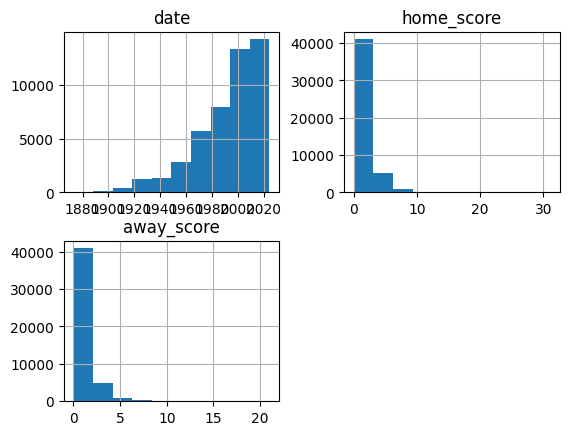

In [31]:
df_results.hist()

<hr class="my-4">

### <a id='toc1_1_6_'></a>[Datenexploration](#toc0_)

#### <a id='toc1_1_6_1_'></a>[Allgemein](#toc0_)

##### <a id='toc1_1_6_1_1_'></a>[Wie viele Spiele gibt es insgesamt?](#toc0_)

In [32]:
num_matches = df_results_fifa.shape[0]
display(num_matches)

40433

##### <a id='toc1_1_6_1_2_'></a>[Was ist das durchschnittliche Heimspielergebnis / Auswärtsspielergebnis?](#toc0_)

In [33]:
average_home_score = df_results_fifa['home_score'].mean()
average_away_score = df_results_fifa['away_score'].mean()
display(average_home_score, average_away_score)

1.722825414883882

1.1535626839462816

In [34]:
df_results_fifa.tail(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_country,home_continent,away_continent,winning_continent
47054,2024-03-26,Colombia,Romania,3.0,2.0,Friendly,Madrid,Spain,True,Colombia,South America,Europe,South America
47055,2024-03-26,Czech Republic,Armenia,2.0,1.0,Friendly,Prague,Czech Republic,False,Czech Republic,Europe,Asia,Europe
47056,2024-03-26,Denmark,Faroe Islands,2.0,0.0,Friendly,Brondbyvester,Denmark,False,Denmark,Europe,Europe,Europe
47057,2024-03-26,El Salvador,Honduras,1.0,1.0,Friendly,Los Angeles,United States,True,Unentschieden,North America,North America,Unentschieden
47058,2024-03-26,England,Belgium,2.0,2.0,Friendly,London,England,False,Unentschieden,Europe,Europe,Unentschieden
47059,2024-03-26,France,Chile,3.0,2.0,Friendly,Marseille,France,False,France,Europe,South America,Europe
47060,2024-03-26,Germany,Netherlands,2.0,1.0,Friendly,Frankfurt,Germany,False,Germany,Europe,Europe,Europe
47061,2024-03-26,Hungary,Kosovo,2.0,0.0,Friendly,Budapest,Hungary,False,Hungary,Europe,Europe,Europe
47062,2024-03-26,Ivory Coast,Uruguay,2.0,1.0,Friendly,Lens,France,True,Ivory Coast,Africa,South America,Africa
47063,2024-03-26,Latvia,Liechtenstein,1.0,1.0,Friendly,Larnaca,Cyprus,True,Unentschieden,Europe,Europe,Unentschieden


##### <a id='toc1_1_6_1_3_'></a>[Wieviele Teams haben bei Heimspielen gewonnen?](#toc0_)

29744

15099

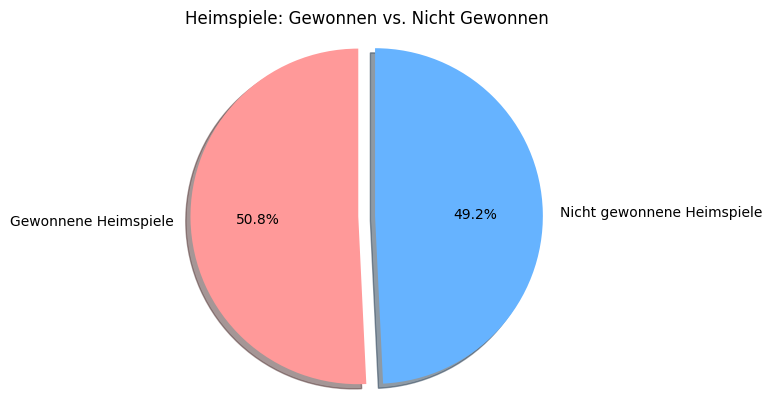

In [35]:
count_home_games = df_results_fifa[(df_results_fifa["home_team"] == df_results_fifa["country"]) & (df_results_fifa["neutral"] == False)]
# Total number of home games
total_home_games = count_home_games.shape[0]
display(total_home_games)
# Number of home games won
won_home_games = count_home_games[count_home_games['home_team'] == count_home_games['winning_country']].shape[0]
display(won_home_games)


labels = ['Gewonnene Heimspiele', 'Nicht gewonnene Heimspiele']
sizes = [won_home_games, total_home_games - won_home_games]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

plt.title('Heimspiele: Gewonnen vs. Nicht Gewonnen')
plt.show()

##### <a id='toc1_1_6_1_4_'></a>[Gibt es einen Heimvorteil? Durchschnittliche Ergebnisse für Heimspiele vs. Auswärtsspiele](#toc0_)

In [36]:
home_advantage = df_results_fifa.groupby('neutral').agg({'home_score': 'mean', 'away_score': 'mean'}).reset_index()
display(home_advantage)

,neutral,home_score,away_score
0,False,1.760673,1.09620
1,True,1.610555,1.32372


##### <a id='toc1_1_6_1_5_'></a>[Welche Teams sind die Top 10?](#toc0_)

In [37]:
top_scoring_teams = df_goalscorers_extended['team'].value_counts().head(10).reset_index()
top_scoring_teams.columns = ['team', 'goals']
display(top_scoring_teams)

,team,goals
0,Brazil,1046
1,Germany,963
2,Argentina,939
3,Spain,884
4,Netherlands,848
5,Mexico,843
6,Uruguay,793
7,England,768
8,France,767
9,Italy,724


##### <a id='toc1_1_6_1_6_'></a>[Welche Spieler sind die Top 10?](#toc0_)

In [38]:
top_players = df_goalscorers_extended['scorer'].value_counts().head(10).reset_index()
top_players.columns = ['scorer', 'goals']
display(top_players)

,scorer,goals
0,Cristiano Ronaldo,111
1,Robert Lewandowski,62
2,Romelu Lukaku,61
3,Harry Kane,55
4,Lionel Messi,54
5,Edin Džeko,50
6,Ali Daei,49
7,Miroslav Klose,48
8,Aleksandar Mitrović,47
9,Carlos Ruiz,47


##### <a id='toc1_1_6_1_7_'></a>[Wie entwickelte sich die Anzahl an Spielen über einen Zeitraum von 152 Jahren?](#toc0_)

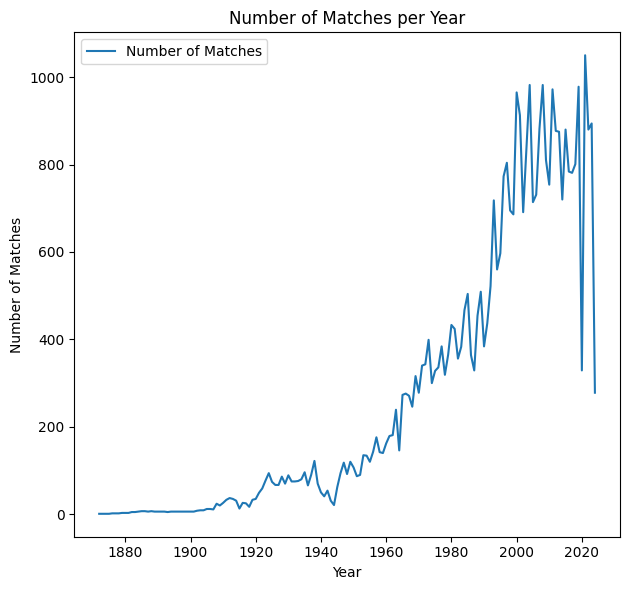

In [39]:
df_results_fifa['year'] = df_results_fifa['date'].dt.year

matches_per_year = df_results_fifa.groupby('year').size().reset_index(name='num_matches')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(matches_per_year['year'], matches_per_year['num_matches'], label='Number of Matches')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Number of Matches per Year')
plt.legend()
plt.tight_layout()
plt.show()

Deutlich zu erkennen ist, dass die Anzahl an Spielen im Laufe der Zeit erheblich zugenommen hat. VOr allem nach dem Tief während des Zweiten Weltkrieges steigt die Kurve deutlich, was durch eine zunehmende Popularität des Fußballs und damit zu einer Zunahme der Spiele liegen könnte. Laut Statista gab es bei der Weltmeisterschaft 1930 lediglich 16 Spiele, wohingegen bei der WM 2022 64 Spiele stattfanden (https://de.statista.com/statistik/daten/studie/158660/umfrage/fussball-wm-anzahl-der-spiele-seit-1930/). Erst 1960 fand die erste UEFA-Europameisterschaft statt (https://www.iffhs.de/wie-ist-fussball-entstanden/) und die Kommerzialisierung des Fußballs hat zu einer größeren Anzahl von Spielen geführt, um die Einnahmen durch Ticketverkäufe, Fernsehen und Sponsoring zu maximieren. Nationalmannschaften bestreiten erst später regelmäßig Freundschaftsspiele, um sich auf wichtige Turniere vorzubereiten, neue Spieler zu testen und ihre FIFA-Weltranglistenpunkte zu verbessern.

##### <a id='toc1_1_6_1_8_'></a>[Wie veränderten sich die Ergebnisse über einen Zeitraum von 152 Jahren?](#toc0_)

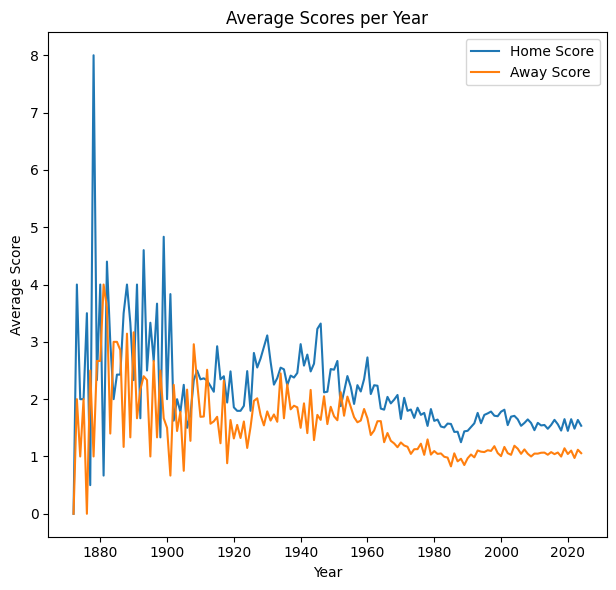

In [40]:
df_goalscorers_extended['year'] = df_goalscorers_extended['date'].dt.year

average_scores_per_year = df_results_fifa.groupby('year').agg({'home_score': 'mean', 'away_score': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(average_scores_per_year['year'], average_scores_per_year['home_score'], label='Home Score')
plt.plot(average_scores_per_year['year'], average_scores_per_year['away_score'], label='Away Score')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Average Scores per Year')
plt.legend()

plt.tight_layout()
plt.show()

##### <a id='toc1_1_6_1_9_'></a>[Wie entwickelten sich die Gesamttore über 152 Jahre?](#toc0_)

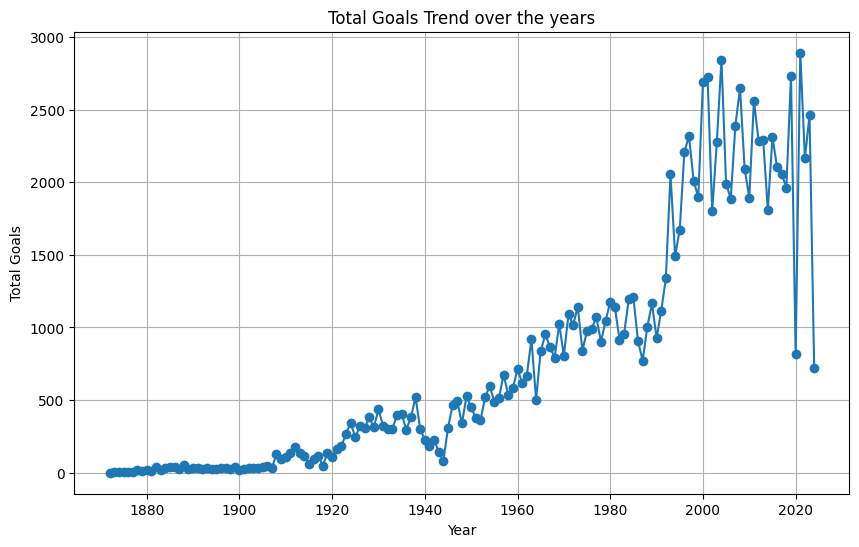

In [41]:
df_results_fifa['total_goals'] = df_results_fifa['home_score'] + df_results_fifa['away_score']
goals_per_year_results = df_results_fifa.groupby('year')['total_goals'].sum()


plt.figure(figsize=(10, 6))
goals_per_year_results.plot(kind='line', marker='o')
plt.title('Total Goals Trend over the years')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.grid(True)
plt.show()

##### <a id='toc1_1_6_1_10_'></a>[Heimvorteilsanalyse: Durchschnittliche Ergebnisse pro Region, pro Team, über die Zeit](#toc0_)

In [42]:
home_advantage_by_country = df_results_fifa.groupby('country').agg({
    'home_score': 'mean',
    'away_score': 'mean',
    'neutral': 'count'
}).reset_index().rename(columns={'neutral': 'num_matches'}).sort_values(by='num_matches', ascending=False).head(10)
display("Home Advantage by Country", home_advantage_by_country)


'Home Advantage by Country'

,country,home_score,away_score,num_matches
229,United States,1.528662,1.148089,1256
71,France,1.838710,1.115007,713
126,Malaysia,1.824034,1.231760,699
173,Qatar,1.588674,1.110283,671
217,Thailand,1.711538,1.238782,624
62,England,2.140203,0.917230,592
79,Germany,2.258993,1.091727,556
227,United Arab Emirates,1.494565,1.130435,552
198,South Africa,1.231618,1.003676,544
26,Brazil,2.092105,1.033835,532


In [43]:
home_advantage_by_team = df_results_fifa.groupby('home_team').agg({
    'home_score': 'mean',
    'away_score': 'mean',
    'neutral': 'count'
}).reset_index().rename(columns={'neutral': 'num_matches'}).sort_values(by='num_matches', ascending=False).head(10)
display("Home Advantage by Team", home_advantage_by_team)


'Home Advantage by Team'

,home_team,home_score,away_score,num_matches
8,Argentina,2.244755,0.844406,572
27,Brazil,2.482270,0.813830,564
117,Mexico,2.007339,0.842202,545
169,South Korea,2.039139,0.745597,511
56,England,2.316206,0.879447,506
175,Sweden,2.352113,1.108652,497
69,Germany,2.518145,1.060484,496
65,France,2.113006,1.063966,469
193,United States,1.747768,0.991071,448
92,Japan,1.920455,1.127273,440


In [44]:
home_advantage_over_time = df_results_fifa.groupby('year').agg({
    'home_score': 'mean',
    'away_score': 'mean'
}).reset_index()
display("Home Advantage over Time", home_advantage_over_time)


'Home Advantage over Time'

,year,home_score,away_score
0,1872,0.000000,0.000000
1,1873,4.000000,2.000000
2,1874,2.000000,1.000000
3,1875,2.000000,2.000000
4,1876,3.500000,0.000000
...,...,...,...
148,2020,1.446809,1.042553
149,2021,1.650476,1.102857
150,2022,1.485227,0.973864
151,2023,1.637584,1.117450


##### <a id='toc1_1_6_1_11_'></a>[In welchem Land / Auf welchem Kontinent werden die meisten Spiele gespielt?](#toc0_)

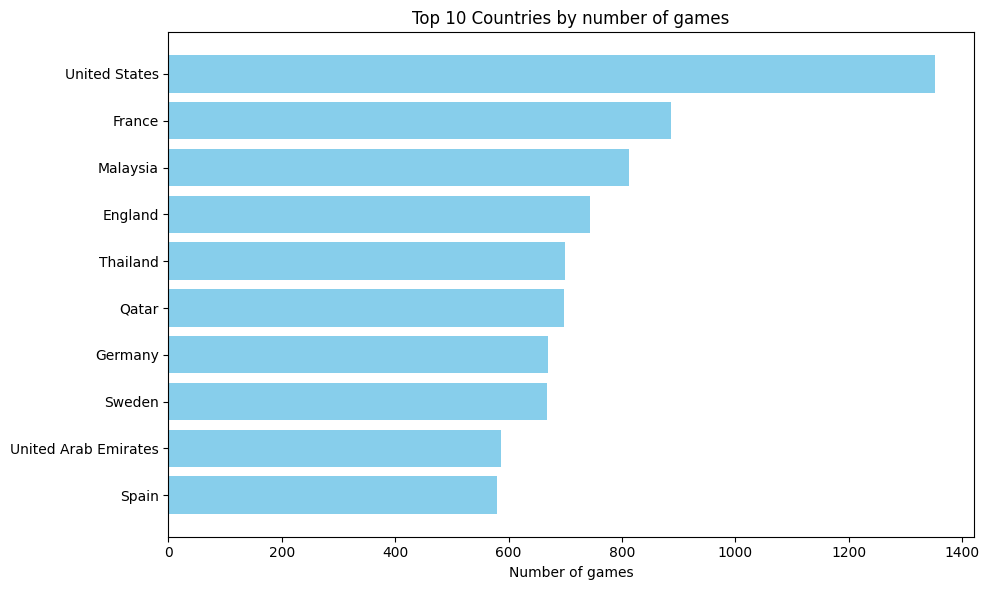

In [45]:
matches_per_country = df_results['country'].value_counts()

top_10_countries = matches_per_country.head(10).sort_values(ascending=True)


fig, axs = plt.subplots(1, 1, figsize=(10, 6))

axs.barh(top_10_countries.index, top_10_countries.values, color='skyblue')
axs.set_xlabel('Number of games')
axs.set_title('Top 10 Countries by number of games')

plt.tight_layout()
plt.show()

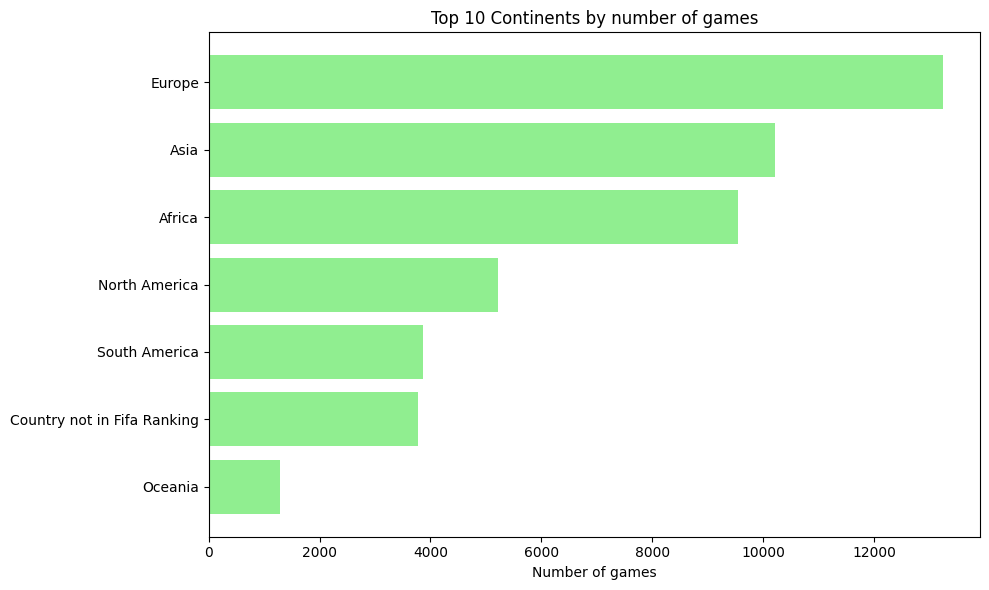

In [46]:
matches_per_continent = df_results['home_continent'].value_counts().sort_values(ascending=True)

fig, axs = plt.subplots(1, 1, figsize=(10, 6))

axs.barh(matches_per_continent.index, matches_per_continent.values, color='lightgreen')
axs.set_xlabel('Number of games')
axs.set_title('Top 10 Continents by number of games')


plt.tight_layout()
plt.show()

##### <a id='toc1_1_6_1_12_'></a>[In welchen Spielminuten fallen die meisten Tore?](#toc0_)

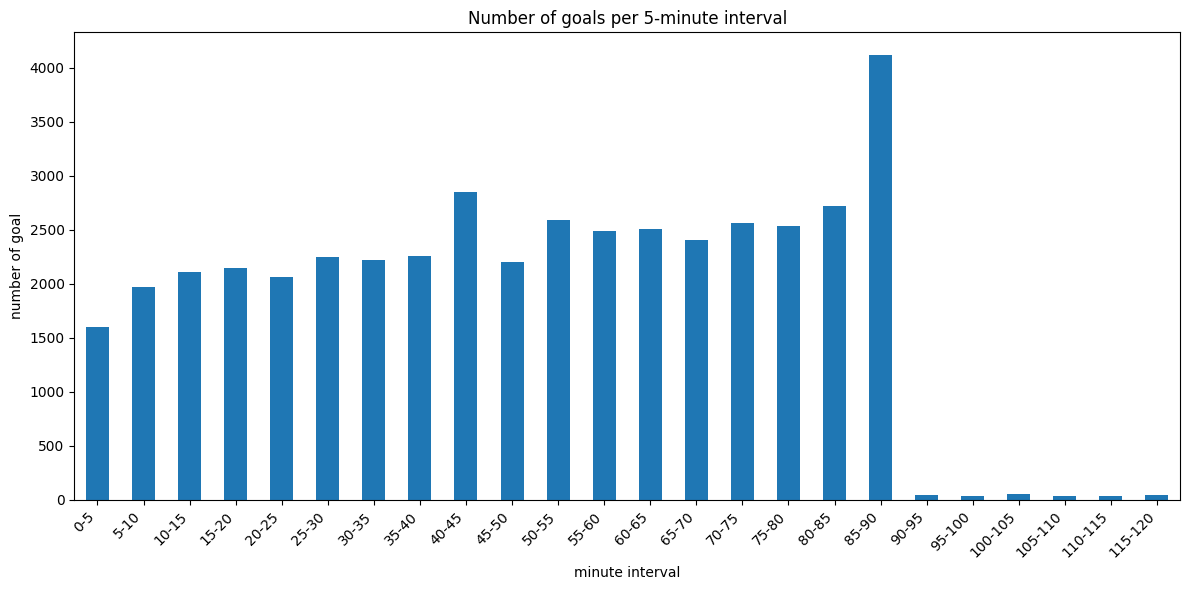

In [47]:
intervals = pd.interval_range(start=0, end=120, freq=5, closed='right')

df_goalscorers_minute = pd.cut(df_goalscorers['minute'], bins=intervals)

interval_counts_5 = df_goalscorers_minute.value_counts().sort_index()


fig, ax = plt.subplots(figsize=(12, 6))
interval_counts_5.plot(kind='bar', ax=ax)

ax.set_title('Number of goals per 5-minute interval')
ax.set_xlabel('minute interval')
ax.set_ylabel('number of goal')

ax.set_xticklabels([f'{int(interval.left)}-{int(interval.right)}' for interval in interval_counts_5.index], rotation=45, ha='right')

plt.tight_layout()
plt.show()

##### <a id='toc1_1_6_1_13_'></a>[Wieviele  Heimsiege und wieviele Auswärtssiege gibt es?](#toc0_)

In [48]:
df_results_home_away = df_results_fifa[df_results_fifa['home_team'] != df_results_fifa['away_team']]

home_wins = df_results_home_away[df_results_home_away['winning_country'] == df_results_home_away['home_team']].shape[0]

away_wins = df_results_home_away[df_results_home_away['winning_country'] == df_results_home_away['away_team']].shape[0]

print(f"Home wins: {home_wins}")
print(f"Away wins: {away_wins}")

Home wins: 19760
Away wins: 11351


##### <a id='toc1_1_6_1_14_'></a>[Wie häufig geht ein Spiel unentschieden aus?](#toc0_)

In [49]:
draws = df_results_fifa[df_results_fifa['winning_country'] == 'Unentschieden'].shape[0]

print(f"Draws: {draws}")

Draws: 9322


Von 40.771 Spielen insgesamt in vorliegendem Datensatz gehen ganze 23% der Spiele unentschieden aus. 

##### <a id='toc1_1_6_1_15_'></a>[Welche Turniere gibt es?](#toc0_)

In [50]:
tournaments = df_results_fifa['tournament'].unique()
print(tournaments)

['Friendly' 'British Home Championship' 'Ã\x89vence CoppÃ©e Trophy'
 'Copa Lipton' 'Copa Newton' 'Copa Premio Honor Argentino'
 'Copa Premio Honor Uruguayo' 'Copa Roca' 'Copa AmÃ©rica'
 'Far Eastern Championship Games' 'Copa Chevallier Boutell'
 'Olympic Games' 'Nordic Championship'
 'Central European International Cup' 'Baltic Cup'
 'Central American and Caribbean Games' 'Balkan Cup' 'FIFA World Cup'
 'Copa Rio Branco' 'FIFA World Cup qualification' 'Bolivarian Games'
 'CCCF Championship' 'NAFC Championship' 'Copa Oswaldo Cruz' 'Asian Games'
 'Pan American Championship' 'Copa del PacÃ\xadfico'
 "Copa Bernardo O'Higgins" 'AFC Asian Cup qualification' 'Atlantic Cup'
 'AFC Asian Cup' 'African Cup of Nations' 'Copa Paz del Chaco'
 'Merdeka Tournament' 'UEFA Euro qualification'
 'Southeast Asian Peninsular Games' 'African Friendship Games'
 'Windward Islands Tournament' 'African Cup of Nations qualification'
 'Vietnam Independence Cup' 'Copa Carlos Dittborn' 'Phillip Seaga Cup'
 'CONCACAF 

##### <a id='toc1_1_6_1_16_'></a>[Wie verhalten sich die durchschnittlichen Ergebnisse des FIFA World Cups pro Jahr?](#toc0_)

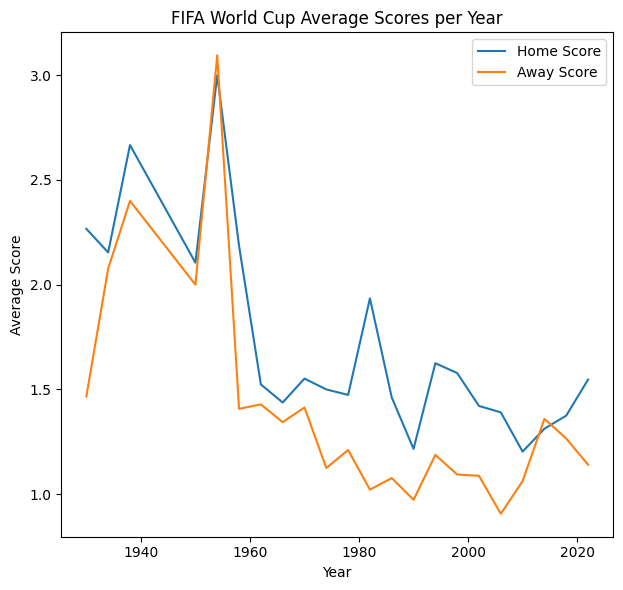

In [51]:
world_cup_data = df_results_fifa[df_results_fifa['tournament'] == 'FIFA World Cup']
world_cup_trends = world_cup_data.groupby('year').agg({
    'home_score': 'mean',
    'away_score': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(world_cup_trends['year'], world_cup_trends['home_score'], label='Home Score')
plt.plot(world_cup_trends['year'], world_cup_trends['away_score'], label='Away Score')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('FIFA World Cup Average Scores per Year')
plt.legend()
plt.tight_layout()
plt.show()

##### <a id='toc1_1_6_1_17_'></a>[Wie verhalten sich die durchschnittlichen Ergebnisse des UEFA EURO pro Jahr?](#toc0_)

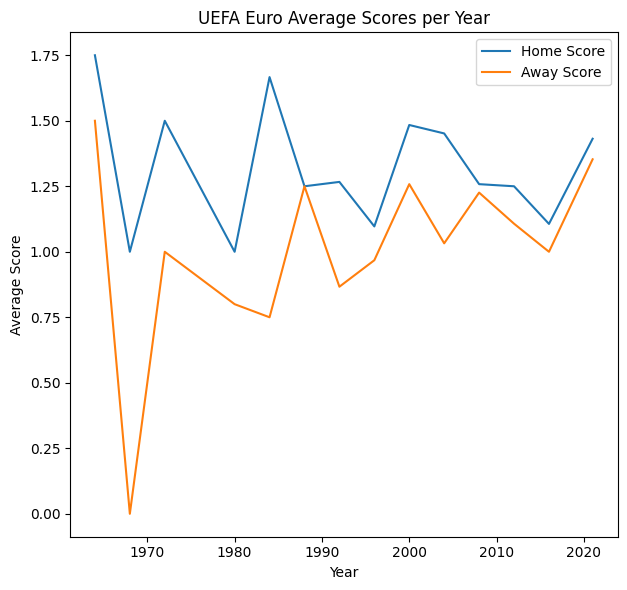

In [52]:
euro_data = df_results_fifa[df_results_fifa['tournament'] == 'UEFA Euro']
euro_trends = euro_data.groupby('year').agg({
    'home_score': 'mean',
    'away_score': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
# Important note: scaling selected larger than in previous visualisation 
plt.subplot(1, 2, 2)
plt.plot(euro_trends['year'], euro_trends['home_score'], label='Home Score')
plt.plot(euro_trends['year'], euro_trends['away_score'], label='Away Score')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('UEFA Euro Average Scores per Year')
plt.legend()

plt.tight_layout()
plt.show()

#### <a id='toc1_1_6_2_'></a>[Länderspezifische Analyse - Alle Länder](#toc0_)

In [53]:
# Count the number of home and away games for each team
total_matches_home = df_results_fifa['home_team'].value_counts()
total_matches_away = df_results_fifa['away_team'].value_counts()

# Count the total number of games by adding the home and away games for each team
total_matches = total_matches_home.add(total_matches_away, fill_value=0).sort_values(ascending=False)

# Count the number of home and away wins for each team
home_wins = df_results_fifa[df_results_fifa['home_score'] > df_results_fifa['away_score']]['home_team'].value_counts()
away_wins = df_results_fifa[df_results_fifa['away_score'] > df_results_fifa['home_score']]['away_team'].value_counts()

# Count the total number of wins by adding the home and away wins for each team
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

# Calculate winning percentages for home, away and overall games
home_win_percentages = (home_wins / total_matches_home * 100).sort_values(ascending=False)
away_win_percentages = (away_wins / total_matches_away * 100).sort_values(ascending=False)
total_win_percentages = (total_wins / total_matches * 100).sort_values(ascending=False)

# Summarise results in a DataFrame
results = pd.DataFrame({
    'Total Matches': total_matches,
    'Home Matches': total_matches_home,
    'Away Matches': total_matches_away,
    'Total Wins': total_wins,
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Total Win %': total_win_percentages,
    'Home Win %': home_win_percentages,
    'Away Win %': away_win_percentages
}).fillna(0)


##### <a id='toc1_1_6_2_1_'></a>[Wie ist die Performance zwischen den Ländern?](#toc0_)

DataFrame nach Gesamtgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Brazil,983,564,419,631.0,407.0,224.0,64.191251,72.163121,53.460621
Spain,687,355,332,404.0,244.0,160.0,58.806405,68.732394,48.192771
Germany,934,496,438,544.0,307.0,237.0,58.244111,61.895161,54.109589
England,1012,506,506,582.0,316.0,266.0,57.509881,62.450593,52.569170
Iran,557,317,240,319.0,202.0,117.0,57.271095,63.722397,48.750000
Argentina,1015,572,443,557.0,384.0,173.0,54.876847,67.132867,39.051919
Italy,796,437,359,430.0,278.0,152.0,54.020101,63.615561,42.339833
Tahiti,214,104,110,115.0,63.0,52.0,53.738318,60.576923,47.272727
Croatia,363,178,185,193.0,106.0,87.0,53.168044,59.550562,47.027027
South Korea,930,511,419,493.0,306.0,187.0,53.010753,59.882583,44.630072


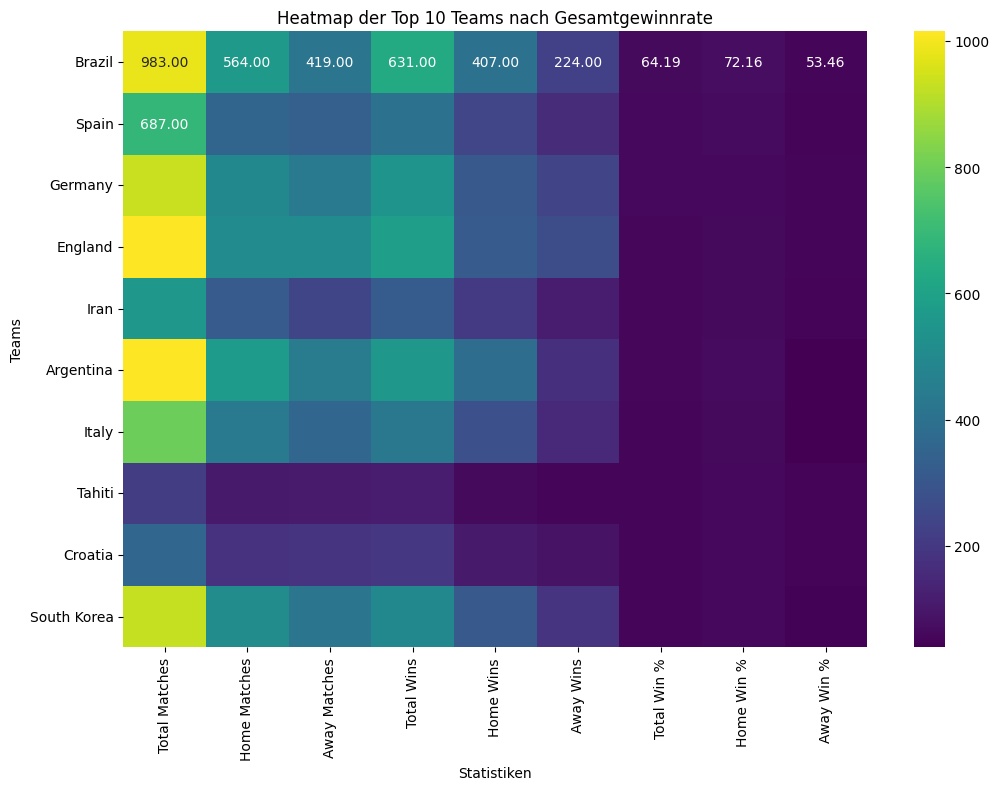

In [54]:
results_sorted_by_total_win_rate = results.sort_values(by='Total Win %', ascending=False).head(10)
print("DataFrame nach Gesamtgewinnrate sortiert:")
display(results_sorted_by_total_win_rate)

plt.figure(figsize=(12, 8))
sns.heatmap(results_sorted_by_total_win_rate, annot=True, fmt='.2f', cmap='viridis', cbar=True)

plt.title('Heatmap der Top 10 Teams nach Gesamtgewinnrate')
plt.xlabel('Statistiken')
plt.ylabel('Teams')

plt.show()

In [55]:
results_sorted_by_home_win_rate = results.sort_values(by='Home Win %', ascending=False).head(10)
print("\nDataFrame nach Heimgewinnrate sortiert:")
display(results_sorted_by_home_win_rate)


DataFrame nach Heimgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Brazil,983,564,419,631.0,407.0,224.0,64.191251,72.163121,53.460621
Spain,687,355,332,404.0,244.0,160.0,58.806405,68.732394,48.192771
Argentina,1015,572,443,557.0,384.0,173.0,54.876847,67.132867,39.051919
Egypt,684,401,283,343.0,265.0,78.0,50.146199,66.084788,27.561837
Ivory Coast,563,287,276,285.0,187.0,98.0,50.621670,65.156794,35.507246
Czech Republic,335,162,173,177.0,105.0,72.0,52.835821,64.814815,41.618497
Iran,557,317,240,319.0,202.0,117.0,57.271095,63.722397,48.750000
Italy,796,437,359,430.0,278.0,152.0,54.020101,63.615561,42.339833
New Caledonia,238,131,107,121.0,83.0,38.0,50.840336,63.358779,35.514019
Ghana,610,291,319,280.0,183.0,97.0,45.901639,62.886598,30.407524


In [56]:
results_sorted_by_away_win_rate = results.sort_values(by='Away Win %', ascending=False).head(10)
print("\nDataFrame nach Auswärtsgewinnrate sortiert:")
display(results_sorted_by_away_win_rate)


DataFrame nach Auswärtsgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Germany,934,496,438,544.0,307.0,237.0,58.244111,61.895161,54.109589
Brazil,983,564,419,631.0,407.0,224.0,64.191251,72.163121,53.460621
England,1012,506,506,582.0,316.0,266.0,57.509881,62.450593,52.569170
Iran,557,317,240,319.0,202.0,117.0,57.271095,63.722397,48.750000
Spain,687,355,332,404.0,244.0,160.0,58.806405,68.732394,48.192771
Tahiti,214,104,110,115.0,63.0,52.0,53.738318,60.576923,47.272727
Croatia,363,178,185,193.0,106.0,87.0,53.168044,59.550562,47.027027
South Korea,930,511,419,493.0,306.0,187.0,53.010753,59.882583,44.630072
Netherlands,785,426,359,403.0,245.0,158.0,51.337580,57.511737,44.011142
Russia,666,292,374,338.0,177.0,161.0,50.750751,60.616438,43.048128


##### <a id='toc1_1_6_2_2_'></a>[Welche Länder haben am häufigsten gespielt?](#toc0_)

In [57]:
most_matches_df = results.sort_values(by='Total Matches', ascending=False).reset_index().rename(columns={'index': 'Country'}).head(10)
display(most_matches_df[['Country', 'Total Matches']])

,Country,Total Matches
0,Sweden,1027
1,Argentina,1015
2,England,1012
3,Brazil,983
4,Germany,934
5,South Korea,930
6,Mexico,925
7,Uruguay,912
8,Hungary,877
9,France,825


##### <a id='toc1_1_6_2_3_'></a>[Welches Land hat die meisten Strafstöße?](#toc0_)

In [58]:
penalty = df_goalscorers_extended[df_goalscorers_extended['penalty'] == True]
penalty_counts = penalty['team'].value_counts().head(15)
print(penalty_counts)

Mexico         65
Brazil         64
England        61
Argentina      58
Netherlands    58
Germany        54
Spain          54
Sweden         52
Italy          51
Denmark        51
France         50
Uruguay        47
Belgium        45
Austria        43
Hungary        41
Name: team, dtype: int64


In [59]:
# Number of home matches and home goals per country
home_stats = df_results_fifa.groupby('home_team').agg(
    home_goals=('home_score', 'sum'),
    home_games=('home_score', 'count')
).reset_index()
home_stats.columns = ['team', 'home_goals', 'home_games']

# Number of away games and away goals per country
away_stats = df_results_fifa.groupby('away_team').agg(
    away_goals=('away_score', 'sum'),
    away_games=('away_score', 'count')
).reset_index()
away_stats.columns = ['team', 'away_goals', 'away_games']

# Merging home and away statistics
total_stats = pd.merge(home_stats, away_stats, on='team', how='outer').fillna(0)

# Calculation of the total number of goals and matches
total_stats['total_goals'] = total_stats['home_goals'] + total_stats['away_goals']
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']

# Calculation of average goals per game
total_stats['avg_goals_per_game'] = total_stats['total_goals'] / total_stats['total_games']

# Calculation of average home and away goals per match
total_stats['avg_home_goals_per_game'] = total_stats['home_goals'] / total_stats['home_games']
total_stats['avg_away_goals_per_game'] = total_stats['away_goals'] / total_stats['away_games']

# Sort by average goals per game in descending order
total_stats = total_stats.sort_values(by='avg_goals_per_game', ascending=False)

# Rounding the average goals per game to 2 decimal places
total_stats['avg_goals_per_game'] = total_stats['avg_goals_per_game'].round(2)
total_stats['avg_home_goals_per_game'] = total_stats['avg_home_goals_per_game'].round(2)
total_stats['avg_away_goals_per_game'] = total_stats['avg_away_goals_per_game'].round(2)


In [60]:
top_avg_goals = total_stats.head(10)
print("Top 10 Teams nach durchschnittlichen Toren pro Spiel:")
display(top_avg_goals)

Top 10 Teams nach durchschnittlichen Toren pro Spiel:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
128,New Caledonia,363.0,131,222.0,107,585.0,238,2.46,2.77,2.07
178,Tahiti,282.0,104,239.0,110,521.0,214,2.43,2.71,2.17
69,Germany,1249.0,496,861.0,438,2110.0,934,2.26,2.52,1.97
56,England,1172.0,506,1066.0,506,2238.0,1012,2.21,2.32,2.11
27,Brazil,1400.0,564,749.0,419,2149.0,983,2.19,2.48,1.79
127,Netherlands,1010.0,426,634.0,359,1644.0,785,2.09,2.37,1.77
11,Australia,720.0,300,382.0,234,1102.0,534,2.06,2.40,1.63
171,Spain,865.0,355,549.0,332,1414.0,687,2.06,2.44,1.65
82,Hungary,997.0,434,766.0,443,1763.0,877,2.01,2.30,1.73
166,Solomon Islands,223.0,88,159.0,103,382.0,191,2.00,2.53,1.54


In [61]:
sorted_by_avg_home_goals = total_stats.sort_values(by='avg_home_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:")
display(sorted_by_avg_home_goals)


DataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
128,New Caledonia,363.0,131,222.0,107,585.0,238,2.46,2.77,2.07
178,Tahiti,282.0,104,239.0,110,521.0,214,2.43,2.71,2.17
166,Solomon Islands,223.0,88,159.0,103,382.0,191,2.00,2.53,1.54
69,Germany,1249.0,496,861.0,438,2110.0,934,2.26,2.52,1.97
27,Brazil,1400.0,564,749.0,419,2149.0,983,2.19,2.48,1.79
171,Spain,865.0,355,549.0,332,1414.0,687,2.06,2.44,1.65
11,Australia,720.0,300,382.0,234,1102.0,534,2.06,2.40,1.63
129,New Zealand,353.0,149,294.0,222,647.0,371,1.74,2.37,1.32
127,Netherlands,1010.0,426,634.0,359,1644.0,785,2.09,2.37,1.77
175,Sweden,1169.0,497,875.0,530,2044.0,1027,1.99,2.35,1.65


In [62]:
sorted_by_avg_away_goals = total_stats.sort_values(by='avg_away_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:")
display(sorted_by_avg_away_goals)


DataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
178,Tahiti,282.0,104,239.0,110,521.0,214,2.43,2.71,2.17
56,England,1172.0,506,1066.0,506,2238.0,1012,2.21,2.32,2.11
128,New Caledonia,363.0,131,222.0,107,585.0,238,2.46,2.77,2.07
69,Germany,1249.0,496,861.0,438,2110.0,934,2.26,2.52,1.97
141,Papua New Guinea,86.0,55,146.0,77,232.0,132,1.76,1.56,1.90
27,Brazil,1400.0,564,749.0,419,2149.0,983,2.19,2.48,1.79
127,Netherlands,1010.0,426,634.0,359,1644.0,785,2.09,2.37,1.77
82,Hungary,997.0,434,766.0,443,1763.0,877,2.01,2.30,1.73
196,Vanuatu,110.0,72,203.0,118,313.0,190,1.65,1.53,1.72
175,Sweden,1169.0,497,875.0,530,2044.0,1027,1.99,2.35,1.65


##### <a id='toc1_1_6_2_4_'></a>[Welches Land hat die meisten Tore erzielt?](#toc0_)

In [63]:
most_goals_df = total_stats.sort_values(by='total_goals', ascending=False).reset_index(drop=True).head(10)
print("Länder mit den meisten erzielten Toren:")
display(most_goals_df[['team', 'total_goals']])


Länder mit den meisten erzielten Toren:


,team,total_goals
0,England,2238.0
1,Brazil,2149.0
2,Germany,2110.0
3,Sweden,2044.0
4,Argentina,1926.0
5,Hungary,1763.0
6,South Korea,1657.0
7,Netherlands,1644.0
8,Mexico,1621.0
9,France,1530.0


#### <a id='toc1_1_6_3_'></a>[Länderspezifische Analyse - Neutrale Länder](#toc0_)

In [64]:
df_results_neutral_countries = df_results_fifa[df_results_fifa["neutral"] == True]

In [65]:
# Count the number of home and away games for each team
total_matches_home = df_results_neutral_countries['home_team'].value_counts()
total_matches_away = df_results_neutral_countries['away_team'].value_counts()

# Count the total number of games by adding the home and away games for each team
total_matches = total_matches_home.add(total_matches_away, fill_value=0).sort_values(ascending=False)

# Count the number of home and away wins for each team
home_wins = df_results_neutral_countries[df_results_neutral_countries['home_score'] > df_results_neutral_countries['away_score']]['home_team'].value_counts()
away_wins = df_results_neutral_countries[df_results_neutral_countries['away_score'] > df_results_neutral_countries['home_score']]['away_team'].value_counts()

# Count the total number of wins by adding the home and away wins for each team
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

# Calculate winning percentages for home, away and overall games
home_win_percentages = (home_wins / total_matches_home * 100).sort_values(ascending=False)
away_win_percentages = (away_wins / total_matches_away * 100).sort_values(ascending=False)
total_win_percentages = (total_wins / total_matches * 100).sort_values(ascending=False)

# Summarise results in a DataFrame
results = pd.DataFrame({
    'Total Matches': total_matches,
    'Home Matches': total_matches_home,
    'Away Matches': total_matches_away,
    'Total Wins': total_wins,
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Total Win %': total_win_percentages,
    'Home Win %': home_win_percentages,
    'Away Win %': away_win_percentages
}).fillna(0)

In [66]:
results_sorted_by_total_win_rate = results.sort_values(by='Total Win %', ascending=False).head(10)
print("DataFrame nach Gesamtgewinnrate sortiert:")
display(results_sorted_by_total_win_rate)

DataFrame nach Gesamtgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Brazil,328.0,232.0,96.0,218.0,162.0,56.0,66.463415,69.827586,58.333333
Tahiti,112.0,66.0,46.0,71.0,44.0,27.0,63.392857,66.666667,58.695652
Argentina,292.0,234.0,58.0,183.0,160.0,23.0,62.671233,68.376068,39.655172
France,107.0,56.0,51.0,59.0,35.0,24.0,55.140187,62.500000,47.058824
Germany,147.0,87.0,60.0,81.0,51.0,30.0,55.102041,58.620690,50.000000
New Caledonia,109.0,58.0,51.0,60.0,38.0,22.0,55.045872,65.517241,43.137255
Israel,40.0,27.0,13.0,22.0,15.0,7.0,55.000000,55.555556,53.846154
Spain,122.0,56.0,66.0,67.0,32.0,35.0,54.918033,57.142857,53.030303
Australia,132.0,85.0,47.0,72.0,51.0,21.0,54.545455,60.000000,44.680851
Portugal,101.0,44.0,57.0,55.0,27.0,28.0,54.455446,61.363636,49.122807


In [67]:
results_sorted_by_home_win_rate = results.sort_values(by='Home Win %', ascending=False).head(10)
print("\nDataFrame nach Heimgewinnrate sortiert:")
display(results_sorted_by_home_win_rate)


DataFrame nach Heimgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Brazil,328.0,232.0,96.0,218.0,162.0,56.0,66.463415,69.827586,58.333333
Argentina,292.0,234.0,58.0,183.0,160.0,23.0,62.671233,68.376068,39.655172
Montenegro,5.0,3.0,2.0,2.0,2.0,0.0,40.000000,66.666667,0.000000
Samoa,20.0,9.0,11.0,7.0,6.0,1.0,35.000000,66.666667,9.090909
Tahiti,112.0,66.0,46.0,71.0,44.0,27.0,63.392857,66.666667,58.695652
New Caledonia,109.0,58.0,51.0,60.0,38.0,22.0,55.045872,65.517241,43.137255
Russia,121.0,54.0,67.0,65.0,35.0,30.0,53.719008,64.814815,44.776119
Saint Vincent and the Grenadines,42.0,11.0,31.0,16.0,7.0,9.0,38.095238,63.636364,29.032258
France,107.0,56.0,51.0,59.0,35.0,24.0,55.140187,62.500000,47.058824
Egypt,200.0,137.0,63.0,100.0,85.0,15.0,50.000000,62.043796,23.809524


In [68]:
results_sorted_by_away_win_rate = results.sort_values(by='Away Win %', ascending=False).head(10)
print("\nDataFrame nach Auswärtsgewinnrate sortiert:")
display(results_sorted_by_away_win_rate)


DataFrame nach Auswärtsgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Netherlands,92.0,53.0,39.0,49.0,26.0,23.0,53.260870,49.056604,58.974359
Tahiti,112.0,66.0,46.0,71.0,44.0,27.0,63.392857,66.666667,58.695652
Brazil,328.0,232.0,96.0,218.0,162.0,56.0,66.463415,69.827586,58.333333
Israel,40.0,27.0,13.0,22.0,15.0,7.0,55.000000,55.555556,53.846154
Uruguay,232.0,62.0,170.0,116.0,25.0,91.0,50.000000,40.322581,53.529412
Uzbekistan,94.0,36.0,58.0,51.0,20.0,31.0,54.255319,55.555556,53.448276
Spain,122.0,56.0,66.0,67.0,32.0,35.0,54.918033,57.142857,53.030303
Germany,147.0,87.0,60.0,81.0,51.0,30.0,55.102041,58.620690,50.000000
Tajikistan,58.0,30.0,28.0,30.0,16.0,14.0,51.724138,53.333333,50.000000
Mexico,410.0,274.0,136.0,206.0,139.0,67.0,50.243902,50.729927,49.264706


##### <a id='toc1_1_6_3_1_'></a>[Welche neutralen Länder haben am häufigsten gespielt?](#toc0_)

In [69]:
most_matches_df = results.sort_values(by='Total Matches', ascending=False).reset_index().rename(columns={'index': 'Country'}).head(10)
print("\nLänder mit den meisten gespielten Matches:")
display(most_matches_df[['Country', 'Total Matches']])


Länder mit den meisten gespielten Matches:


,Country,Total Matches
0,Mexico,410.0
1,South Korea,404.0
2,Brazil,328.0
3,Iraq,308.0
4,Thailand,301.0
5,Argentina,292.0
6,Saudi Arabia,289.0
7,Indonesia,285.0
8,Japan,280.0
9,Myanmar,263.0


In [70]:
# Number of home matches and home goals per country
home_stats = df_results_neutral_countries.groupby('home_team').agg(
    home_goals=('home_score', 'sum'),
    home_games=('home_score', 'count')
).reset_index()
home_stats.columns = ['team', 'home_goals', 'home_games']

# Number of away games and away goals per country
away_stats = df_results_neutral_countries.groupby('away_team').agg(
    away_goals=('away_score', 'sum'),
    away_games=('away_score', 'count')
).reset_index()
away_stats.columns = ['team', 'away_goals', 'away_games']

# Merging home and away statistics
total_stats = pd.merge(home_stats, away_stats, on='team', how='outer').fillna(0)

# Calculation of the total number of goals and matches
total_stats['total_goals'] = total_stats['home_goals'] + total_stats['away_goals']
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']

# Calculation of average goals per game
total_stats['avg_goals_per_game'] = total_stats['total_goals'] / total_stats['total_games']

# Calculation of average home and away goals per match
total_stats['avg_home_goals_per_game'] = total_stats['home_goals'] / total_stats['home_games']
total_stats['avg_away_goals_per_game'] = total_stats['away_goals'] / total_stats['away_games']

# Sort by average goals per game in descending order
total_stats = total_stats.sort_values(by='avg_goals_per_game', ascending=False)

# Rounding the average goals per game to 2 decimal places
total_stats['avg_goals_per_game'] = total_stats['avg_goals_per_game'].round(2)
total_stats['avg_home_goals_per_game'] = total_stats['avg_home_goals_per_game'].round(2)
total_stats['avg_away_goals_per_game'] = total_stats['avg_away_goals_per_game'].round(2)


In [71]:
top_avg_goals = total_stats.head(10)
print("Top 10 Teams nach durchschnittlichen Toren pro Spiel:")
display(top_avg_goals)

Top 10 Teams nach durchschnittlichen Toren pro Spiel:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
127,New Caledonia,172.0,58.0,136.0,51.0,308.0,109.0,2.83,2.97,2.67
177,Tahiti,173.0,66.0,142.0,46.0,315.0,112.0,2.81,2.62,3.09
62,Fiji,200.0,68.0,77.0,35.0,277.0,103.0,2.69,2.94,2.20
165,Solomon Islands,126.0,38.0,94.0,55.0,220.0,93.0,2.37,3.32,1.71
27,Brazil,556.0,232.0,192.0,96.0,748.0,328.0,2.28,2.40,2.00
8,Argentina,562.0,234.0,89.0,58.0,651.0,292.0,2.23,2.40,1.53
87,Israel,62.0,27.0,26.0,13.0,88.0,40.0,2.20,2.30,2.00
81,Hungary,83.0,34.0,52.0,28.0,135.0,62.0,2.18,2.44,1.86
11,Australia,190.0,85.0,90.0,47.0,280.0,132.0,2.12,2.24,1.91
140,Papua New Guinea,53.0,35.0,109.0,42.0,162.0,77.0,2.10,1.51,2.60


In [72]:
sorted_by_avg_home_goals = total_stats.sort_values(by='avg_home_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:")
display(sorted_by_avg_home_goals)


DataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
165,Solomon Islands,126.0,38.0,94.0,55.0,220.0,93.0,2.37,3.32,1.71
127,New Caledonia,172.0,58.0,136.0,51.0,308.0,109.0,2.83,2.97,2.67
62,Fiji,200.0,68.0,77.0,35.0,277.0,103.0,2.69,2.94,2.20
154,Samoa,26.0,9.0,12.0,11.0,38.0,20.0,1.90,2.89,1.09
153,Saint Vincent and the Grenadines,30.0,11.0,38.0,31.0,68.0,42.0,1.62,2.73,1.23
177,Tahiti,173.0,66.0,142.0,46.0,315.0,112.0,2.81,2.62,3.09
81,Hungary,83.0,34.0,52.0,28.0,135.0,62.0,2.18,2.44,1.86
8,Argentina,562.0,234.0,89.0,58.0,651.0,292.0,2.23,2.40,1.53
27,Brazil,556.0,232.0,192.0,96.0,748.0,328.0,2.28,2.40,2.00
72,Grenada,72.0,30.0,34.0,26.0,106.0,56.0,1.89,2.40,1.31


In [73]:
sorted_by_avg_away_goals = total_stats.sort_values(by='avg_away_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:")
display(sorted_by_avg_away_goals)


DataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
177,Tahiti,173.0,66.0,142.0,46.0,315.0,112.0,2.81,2.62,3.09
127,New Caledonia,172.0,58.0,136.0,51.0,308.0,109.0,2.83,2.97,2.67
140,Papua New Guinea,53.0,35.0,109.0,42.0,162.0,77.0,2.10,1.51,2.60
173,Suriname,21.0,13.0,79.0,35.0,100.0,48.0,2.08,1.62,2.26
126,Netherlands,91.0,53.0,88.0,39.0,179.0,92.0,1.95,1.72,2.26
62,Fiji,200.0,68.0,77.0,35.0,277.0,103.0,2.69,2.94,2.20
194,Uzbekistan,61.0,36.0,122.0,58.0,183.0,94.0,1.95,1.69,2.10
187,Turkmenistan,50.0,25.0,73.0,35.0,123.0,60.0,2.05,2.00,2.09
193,Uruguay,93.0,62.0,347.0,170.0,440.0,232.0,1.90,1.50,2.04
195,Vanuatu,54.0,27.0,157.0,78.0,211.0,105.0,2.01,2.00,2.01


In [74]:
most_goals_df = total_stats.sort_values(by='total_goals', ascending=False).reset_index(drop=True).head(10)
print("Länder mit den meisten erzielten Toren:")
display(most_goals_df[['team', 'total_goals']])

Länder mit den meisten erzielten Toren:


,team,total_goals
0,Brazil,748.0
1,South Korea,710.0
2,Mexico,675.0
3,Argentina,651.0
4,Japan,514.0
5,Iraq,511.0
6,Indonesia,510.0
7,Myanmar,499.0
8,Kuwait,467.0
9,Thailand,467.0


#### <a id='toc1_1_6_4_'></a>[Länderspezifische Analyse - Nicht-neutrale Länder](#toc0_)

In [75]:
df_results_not_neutral_countries = df_results_fifa[df_results_fifa["neutral"] == False]

In [76]:
# Count the number of home and away games for each team
total_matches_home = df_results_not_neutral_countries['home_team'].value_counts()
total_matches_away = df_results_not_neutral_countries['away_team'].value_counts()

# Count the total number of games by adding the home and away games for each team
total_matches = total_matches_home.add(total_matches_away, fill_value=0).sort_values(ascending=False)

# Count the number of home and away wins for each team
home_wins = df_results_not_neutral_countries[df_results_not_neutral_countries['home_score'] > df_results_not_neutral_countries['away_score']]['home_team'].value_counts()
away_wins = df_results_not_neutral_countries[df_results_not_neutral_countries['away_score'] > df_results_not_neutral_countries['home_score']]['away_team'].value_counts()

# Count the total number of wins by adding the home and away wins for each team
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

# Calculate winning percentages for home, away and overall games
home_win_percentages = (home_wins / total_matches_home * 100).sort_values(ascending=False)
away_win_percentages = (away_wins / total_matches_away * 100).sort_values(ascending=False)
total_win_percentages = (total_wins / total_matches * 100).sort_values(ascending=False)

# Summarise results in a DataFrame
results = pd.DataFrame({
    'Total Matches': total_matches,
    'Home Matches': total_matches_home,
    'Away Matches': total_matches_away,
    'Total Wins': total_wins,
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Total Win %': total_win_percentages,
    'Home Win %': home_win_percentages,
    'Away Win %': away_win_percentages
}).fillna(0)

In [77]:
results_sorted_by_total_win_rate = results.sort_values(by='Total Win %', ascending=False).head(10)
print("DataFrame nach Gesamtgewinnrate sortiert:")
display(results_sorted_by_total_win_rate)

DataFrame nach Gesamtgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Brazil,655.0,332.0,323,413.0,245.0,168.0,63.053435,73.795181,52.012384
Iran,353.0,199.0,154,218.0,141.0,77.0,61.756374,70.854271,50.000000
England,903.0,454.0,449,539.0,293.0,246.0,59.689922,64.537445,54.788419
Spain,565.0,299.0,266,337.0,212.0,125.0,59.646018,70.903010,46.992481
Germany,787.0,409.0,378,463.0,256.0,207.0,58.831004,62.591687,54.761905
Italy,648.0,356.0,292,364.0,240.0,124.0,56.172840,67.415730,42.465753
Croatia,295.0,145.0,150,165.0,95.0,70.0,55.932203,65.517241,46.666667
South Korea,526.0,319.0,207,289.0,199.0,90.0,54.942966,62.382445,43.478261
Czech Republic,281.0,135.0,146,151.0,90.0,61.0,53.736655,66.666667,41.780822
Mexico,515.0,271.0,244,270.0,185.0,85.0,52.427184,68.265683,34.836066


In [78]:
results_sorted_by_home_win_rate = results.sort_values(by='Home Win %', ascending=False).head(10)
print("\nDataFrame nach Heimgewinnrate sortiert:")
display(results_sorted_by_home_win_rate)


DataFrame nach Heimgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Brazil,655.0,332.0,323,413.0,245.0,168.0,63.053435,73.795181,52.012384
Spain,565.0,299.0,266,337.0,212.0,125.0,59.646018,70.903010,46.992481
Iran,353.0,199.0,154,218.0,141.0,77.0,61.756374,70.854271,50.000000
Guinea,327.0,125.0,202,123.0,87.0,36.0,37.614679,69.600000,17.821782
Ivory Coast,378.0,189.0,189,190.0,130.0,60.0,50.264550,68.783069,31.746032
Iraq,285.0,101.0,184,126.0,69.0,57.0,44.210526,68.316832,30.978261
Mexico,515.0,271.0,244,270.0,185.0,85.0,52.427184,68.265683,34.836066
Egypt,484.0,264.0,220,243.0,180.0,63.0,50.206612,68.181818,28.636364
Ghana,410.0,182.0,228,191.0,124.0,67.0,46.585366,68.131868,29.385965
Nigeria,415.0,193.0,222,197.0,131.0,66.0,47.469880,67.875648,29.729730


In [79]:
results_sorted_by_away_win_rate = results.sort_values(by='Away Win %', ascending=False).head(10)
print("\nDataFrame nach Auswärtsgewinnrate sortiert:")
display(results_sorted_by_away_win_rate)


DataFrame nach Auswärtsgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
England,903.0,454.0,449,539.0,293.0,246.0,59.689922,64.537445,54.788419
Germany,787.0,409.0,378,463.0,256.0,207.0,58.831004,62.591687,54.761905
Brazil,655.0,332.0,323,413.0,245.0,168.0,63.053435,73.795181,52.012384
Iran,353.0,199.0,154,218.0,141.0,77.0,61.756374,70.854271,50.000000
Spain,565.0,299.0,266,337.0,212.0,125.0,59.646018,70.903010,46.992481
Croatia,295.0,145.0,150,165.0,95.0,70.0,55.932203,65.517241,46.666667
South Korea,526.0,319.0,207,289.0,199.0,90.0,54.942966,62.382445,43.478261
Russia,545.0,238.0,307,273.0,142.0,131.0,50.091743,59.663866,42.671010
Italy,648.0,356.0,292,364.0,240.0,124.0,56.172840,67.415730,42.465753
Netherlands,693.0,373.0,320,354.0,219.0,135.0,51.082251,58.713137,42.187500


##### <a id='toc1_1_6_4_1_'></a>[Welche nicht-neutralen Länder haben am häufigsten gespielt?](#toc0_)

In [80]:
most_matches_df = results.sort_values(by='Total Matches', ascending=False).reset_index().rename(columns={'index': 'Country'}).head(10)
print("\nLänder mit den meisten gespielten Matches:")
display(most_matches_df[['Country', 'Total Matches']])


Länder mit den meisten gespielten Matches:


,Country,Total Matches
0,Sweden,912.0
1,England,903.0
2,Hungary,815.0
3,Germany,787.0
4,Norway,755.0
5,Scotland,750.0
6,Denmark,726.0
7,Argentina,723.0
8,Switzerland,721.0
9,France,718.0


In [81]:
# Number of home matches and home goals per country
home_stats = df_results_not_neutral_countries.groupby('home_team').agg(
    home_goals=('home_score', 'sum'),
    home_games=('home_score', 'count')
).reset_index()
home_stats.columns = ['team', 'home_goals', 'home_games']

# Number of away games and away goals per country
away_stats = df_results_not_neutral_countries.groupby('away_team').agg(
    away_goals=('away_score', 'sum'),
    away_games=('away_score', 'count')
).reset_index()
away_stats.columns = ['team', 'away_goals', 'away_games']

# Merging home and away statistics
total_stats = pd.merge(home_stats, away_stats, on='team', how='outer').fillna(0)

# Calculation of the total number of goals and matches
total_stats['total_goals'] = total_stats['home_goals'] + total_stats['away_goals']
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']

# Calculation of average goals per game
total_stats['avg_goals_per_game'] = total_stats['total_goals'] / total_stats['total_games']

# Calculation of average home and away goals per match
total_stats['avg_home_goals_per_game'] = total_stats['home_goals'] / total_stats['home_games']
total_stats['avg_away_goals_per_game'] = total_stats['away_goals'] / total_stats['away_games']

# Sort by average goals per game in descending order
total_stats = total_stats.sort_values(by='avg_goals_per_game', ascending=False)

# Rounding the average goals per game
total_stats['avg_goals_per_game'] = total_stats['avg_goals_per_game'].round(2)
total_stats['avg_home_goals_per_game'] = total_stats['avg_home_goals_per_game'].round(2)
total_stats['avg_away_goals_per_game'] = total_stats['avg_away_goals_per_game'].round(2)


In [82]:
top_avg_goals = total_stats.head(10)
print("Top 10 Teams nach durchschnittlichen Toren pro Spiel:")
display(top_avg_goals)

Top 10 Teams nach durchschnittlichen Toren pro Spiel:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
67,Germany,1075.0,409.0,751.0,378,1826.0,787.0,2.32,2.63,1.99
54,England,1095.0,454.0,982.0,449,2077.0,903.0,2.30,2.41,2.19
126,New Caledonia,191.0,73.0,86.0,56,277.0,129.0,2.15,2.62,1.54
26,Brazil,844.0,332.0,557.0,323,1401.0,655.0,2.14,2.54,1.72
125,Netherlands,919.0,373.0,546.0,320,1465.0,693.0,2.11,2.46,1.71
169,Spain,742.0,299.0,444.0,266,1186.0,565.0,2.10,2.48,1.67
173,Sweden,1088.0,450.0,780.0,462,1868.0,912.0,2.05,2.42,1.69
10,Australia,530.0,215.0,292.0,187,822.0,402.0,2.04,2.47,1.56
176,Tahiti,109.0,38.0,97.0,64,206.0,102.0,2.02,2.87,1.52
80,Hungary,914.0,400.0,714.0,415,1628.0,815.0,2.00,2.28,1.72


In [83]:
sorted_by_avg_home_goals = total_stats.sort_values(by='avg_home_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:")
display(sorted_by_avg_home_goals)


DataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
176,Tahiti,109.0,38.0,97.0,64,206.0,102.0,2.02,2.87,1.52
67,Germany,1075.0,409.0,751.0,378,1826.0,787.0,2.32,2.63,1.99
126,New Caledonia,191.0,73.0,86.0,56,277.0,129.0,2.15,2.62,1.54
26,Brazil,844.0,332.0,557.0,323,1401.0,655.0,2.14,2.54,1.72
169,Spain,742.0,299.0,444.0,266,1186.0,565.0,2.10,2.48,1.67
10,Australia,530.0,215.0,292.0,187,822.0,402.0,2.04,2.47,1.56
125,Netherlands,919.0,373.0,546.0,320,1465.0,693.0,2.11,2.46,1.71
127,New Zealand,275.0,112.0,229.0,162,504.0,274.0,1.84,2.46,1.41
173,Sweden,1088.0,450.0,780.0,462,1868.0,912.0,2.05,2.42,1.69
54,England,1095.0,454.0,982.0,449,2077.0,903.0,2.30,2.41,2.19


In [84]:
sorted_by_avg_away_goals = total_stats.sort_values(by='avg_away_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:")
display(sorted_by_avg_away_goals)


DataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
54,England,1095.0,454.0,982.0,449,2077.0,903.0,2.30,2.41,2.19
67,Germany,1075.0,409.0,751.0,378,1826.0,787.0,2.32,2.63,1.99
80,Hungary,914.0,400.0,714.0,415,1628.0,815.0,2.00,2.28,1.72
26,Brazil,844.0,332.0,557.0,323,1401.0,655.0,2.14,2.54,1.72
125,Netherlands,919.0,373.0,546.0,320,1465.0,693.0,2.11,2.46,1.71
173,Sweden,1088.0,450.0,780.0,462,1868.0,912.0,2.05,2.42,1.69
169,Spain,742.0,299.0,444.0,266,1186.0,565.0,2.10,2.48,1.67
156,Scotland,717.0,371.0,594.0,379,1311.0,750.0,1.75,1.93,1.57
11,Austria,769.0,379.0,521.0,333,1290.0,712.0,1.81,2.03,1.56
10,Australia,530.0,215.0,292.0,187,822.0,402.0,2.04,2.47,1.56


In [85]:
most_goals_df = total_stats.sort_values(by='total_goals', ascending=False).reset_index(drop=True).head(10)
print("Länder mit den meisten erzielten Toren:")
display(most_goals_df[['team', 'total_goals']])

Länder mit den meisten erzielten Toren:


,team,total_goals
0,England,2077.0
1,Sweden,1868.0
2,Germany,1826.0
3,Hungary,1628.0
4,Netherlands,1465.0
5,Brazil,1401.0
6,Denmark,1363.0
7,France,1334.0
8,Scotland,1311.0
9,Belgium,1292.0


#### <a id='toc1_1_6_5_'></a>[Länderspezifische Berechnung der Gewinnrate mit Null-Division-Handling](#toc0_)

In [86]:
# Function for calculating the win rate with treatment of zero division
def calculate_win_rate(wins, games):
    '''
        calculates the win rate of each game by dividing the games from the wins 
    '''
    if games == 0:
        return 0
    else:
        return wins / games

# Calculate statistics for home games
home_stats = df_shootouts_fifa.groupby('home_team').agg(
    home_games=('home_team', 'size'),
    home_wins=('winner', lambda x: (x == df_shootouts_fifa.loc[x.index, 'home_team']).sum()),
    home_losses=('winner', lambda x: (x != df_shootouts_fifa.loc[x.index, 'home_team']).sum())
).reset_index()
home_stats['home_win_rate'] = home_stats.apply(lambda row: calculate_win_rate(row['home_wins'], row['home_games']), axis=1)
home_stats.rename(columns={'home_team': 'team'}, inplace=True)

# Calculate statistics for away games
away_stats = df_shootouts_fifa.groupby('away_team').agg(
    away_games=('away_team', 'size'),
    away_wins=('winner', lambda x: (x == df_shootouts_fifa.loc[x.index, 'away_team']).sum()),
    away_losses=('winner', lambda x: (x != df_shootouts_fifa.loc[x.index, 'away_team']).sum())
).reset_index()
away_stats['away_win_rate'] = away_stats.apply(lambda row: calculate_win_rate(row['away_wins'], row['away_games']), axis=1)
away_stats.rename(columns={'away_team': 'team'}, inplace=True)

# Merging home and away statistics
total_stats = pd.merge(home_stats, away_stats, on='team', how='outer').fillna(0)

# Calculation of overall statistics
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']
total_stats['total_wins'] = total_stats['home_wins'] + total_stats['away_wins']
total_stats['total_losses'] = total_stats['home_losses'] + total_stats['away_losses']
total_stats['total_win_rate'] = total_stats.apply(lambda row: calculate_win_rate(row['total_wins'], row['total_games']), axis=1)

# Sort by total win rate and total games in descending order
sorted_total_stats = total_stats.sort_values(by=['total_win_rate', 'total_games'], ascending=[False, False]).reset_index(drop=True)
sorted_total_stats = sorted_total_stats.head(10)

# DataFrame sorted by home win rate and then by most home games
sorted_by_home_win_rate = total_stats.sort_values(by=['home_win_rate', 'home_games'], ascending=[False, False]).reset_index(drop=True)
sorted_by_home_win_rate = sorted_by_home_win_rate.head(10)

# DataFrame sorted by away win rate and then by most away games
sorted_by_away_win_rate = total_stats.sort_values(by=['away_win_rate', 'away_games'], ascending=[False, False]).reset_index(drop=True)
sorted_by_away_win_rate = sorted_by_away_win_rate.head(10)

# Output of the sorted DataFrames
print("Sorted by Total Win Rate and Total Games:")
display(sorted_total_stats[['team', 'home_games', 'home_wins', 'home_losses', 'home_win_rate', 
                            'away_games', 'away_wins', 'away_losses', 'away_win_rate', 
                            'total_games', 'total_wins', 'total_losses', 'total_win_rate']])

print("\nDataFrame sorted by Home Win Rate and then by Home Games:")
display(sorted_by_home_win_rate[['team', 'home_games', 'home_wins', 'home_losses', 'home_win_rate', 
                                 'away_games', 'away_wins', 'away_losses', 'away_win_rate', 
                                 'total_games', 'total_wins', 'total_losses', 'total_win_rate']])

print("\nDataFrame sorted by Away Win Rate and then by Away Games:")
display(sorted_by_away_win_rate[['team', 'home_games', 'home_wins', 'home_losses', 'home_win_rate', 
                                 'away_games', 'away_wins', 'away_losses', 'away_win_rate', 
                                 'total_games', 'total_wins', 'total_losses', 'total_win_rate']])

# DataFrame with the most total games
most_games_stats = total_stats.sort_values(by='total_games', ascending=False).reset_index(drop=True)
most_games_stats = most_games_stats.head(10)
print("\nContinents with Most Total Games:")
display(most_games_stats[['team', 'total_games']])


Sorted by Total Win Rate and Total Games:


,team,home_games,home_wins,home_losses,home_win_rate,away_games,away_wins,away_losses,away_win_rate,total_games,total_wins,total_losses,total_win_rate
0,Ethiopia,5.0,5.0,0.0,1.0,2.0,2.0,0.0,1.0,7.0,7.0,0.0,1.0
1,Seychelles,2.0,2.0,0.0,1.0,2.0,2.0,0.0,1.0,4.0,4.0,0.0,1.0
2,Bahrain,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0,0.0,1.0
3,Benin,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0,0.0,1.0
4,Guatemala,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0,0.0,1.0
5,Kazakhstan,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0,0.0,1.0
6,Antigua and Barbuda,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0
7,Belgium,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0
8,Cyprus,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0
9,Scotland,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0



DataFrame sorted by Home Win Rate and then by Home Games:


,team,home_games,home_wins,home_losses,home_win_rate,away_games,away_wins,away_losses,away_win_rate,total_games,total_wins,total_losses,total_win_rate
0,Australia,5.0,5.0,0.0,1.0,3.0,0.0,3.0,0.000000,8.0,5.0,3.0,0.625
1,Ethiopia,5.0,5.0,0.0,1.0,2.0,2.0,0.0,1.000000,7.0,7.0,0.0,1.000
2,Bahrain,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.000000,3.0,3.0,0.0,1.000
3,Benin,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.000000,3.0,3.0,0.0,1.000
4,Cyprus,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.000000,2.0,2.0,0.0,1.000
5,Guatemala,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.000000,3.0,3.0,0.0,1.000
6,Guinea,2.0,2.0,0.0,1.0,8.0,6.0,2.0,0.750000,10.0,8.0,2.0,0.800
7,Honduras,2.0,2.0,0.0,1.0,6.0,2.0,4.0,0.333333,8.0,4.0,4.0,0.500
8,Kazakhstan,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.000000,3.0,3.0,0.0,1.000
9,Seychelles,2.0,2.0,0.0,1.0,2.0,2.0,0.0,1.000000,4.0,4.0,0.0,1.000



DataFrame sorted by Away Win Rate and then by Away Games:


,team,home_games,home_wins,home_losses,home_win_rate,away_games,away_wins,away_losses,away_win_rate,total_games,total_wins,total_losses,total_win_rate
0,Indonesia,8.0,7.0,1.0,0.875000,3.0,3.0,0.0,1.0,11.0,10.0,1.0,0.909091
1,Poland,1.0,0.0,1.0,0.000000,3.0,3.0,0.0,1.0,4.0,3.0,1.0,0.750000
2,Saudi Arabia,6.0,4.0,2.0,0.666667,3.0,3.0,0.0,1.0,9.0,7.0,2.0,0.777778
3,Sweden,3.0,1.0,2.0,0.333333,3.0,3.0,0.0,1.0,6.0,4.0,2.0,0.666667
4,Ukraine,1.0,0.0,1.0,0.000000,3.0,3.0,0.0,1.0,4.0,3.0,1.0,0.750000
5,Ecuador,1.0,0.0,1.0,0.000000,2.0,2.0,0.0,1.0,3.0,2.0,1.0,0.666667
6,Ethiopia,5.0,5.0,0.0,1.000000,2.0,2.0,0.0,1.0,7.0,7.0,0.0,1.000000
7,Germany,5.0,4.0,1.0,0.800000,2.0,2.0,0.0,1.0,7.0,6.0,1.0,0.857143
8,Portugal,3.0,1.0,2.0,0.333333,2.0,2.0,0.0,1.0,5.0,3.0,2.0,0.600000
9,Seychelles,2.0,2.0,0.0,1.000000,2.0,2.0,0.0,1.0,4.0,4.0,0.0,1.000000



Continents with Most Total Games:


,team,total_games
0,South Africa,28.0
1,Zambia,25.0
2,South Korea,23.0
3,Thailand,22.0
4,Egypt,21.0
5,Argentina,21.0
6,Senegal,20.0
7,Iran,19.0
8,Malawi,18.0
9,Ivory Coast,18.0


#### <a id='toc1_1_6_6_'></a>[Länderspezifische Korrelationsanalyse:](#toc0_)

In [87]:
# Coding of the teams
df_corr = df_results_fifa
df_corr['home_team_code'] = df_results_fifa['home_team'].astype('category').cat.codes
df_corr['away_team_code'] = df_results_fifa['away_team'].astype('category').cat.codes

# Calculate correlation and p-value
correlation, p_value = pearsonr(df_corr['home_score'], df_corr['away_team_code'])

print(f'Korrelation zwischen der Anzahl der geschossenen Tore des Heimteams und dem Auswärtsteam: {correlation}')
print(f'p-Wert: {p_value}')

Korrelation zwischen der Anzahl der geschossenen Tore des Heimteams und dem Auswärtsteam: -0.022634664394519402
p-Wert: 5.318601970686508e-06


Der Korrelationswert liegt sehr nahe bei 0, was darauf hinweist, dass es nahezu keine lineare Beziehung zwischen den geschossenen Toren des Heimteams und dem Wert des Auswärtsteams gibt. Ein sehr kleiner p-Wert deutet darauf hin, dass das Ergebnis statistisch signifikant ist. Das bedeutet, dass die Wahrscheinlichkeit, dass diese Korrelation durch Zufall entstanden ist, extrem gering ist.

Um relevante Erkenntnisse zu gewinnen, sollten andere Variablen und deren Beziehungen untersucht werden.

In [88]:
# Convert Boolean columns into numerical values
df_results_fifa_extended = df_results_fifa.copy()
df_results_fifa_extended["winning_country_is_home_team"] = df_results_fifa_extended.apply(lambda x: True if x["home_team"] == x["winning_country"] else False, axis=1)
df_results_fifa_extended['neutral'] = df_results_fifa_extended['neutral'].astype(int)
df_results_fifa_extended['winning_country_is_home_team'] = df_results_fifa_extended['winning_country_is_home_team'].astype(int)

# Calculate correlation
correlation = df_results_fifa_extended['neutral'].corr(df_results_fifa_extended['winning_country_is_home_team'])

print(f'Korrelation zwischen neutral und winning_country_is_home_team: {correlation}')

Korrelation zwischen neutral und winning_country_is_home_team: -0.05935328923105954


Der Korrelationswert liegt nahe bei 0, was darauf hinweist, dass es kaum eine lineare Beziehung zwischen der Neutralität des Spielorts und der Wahrscheinlichkeit, dass das Gewinnerteam die Heimmannschaft ist, gibt. Die Stärke der Korrelation ist so gering, dass sie in der Praxis kaum von Bedeutung ist. Spiele auf neutralem Boden können viele Kontexte haben, wie z.B. Turniere, bei denen keines der Teams einen Heimvorteil hat. Dies könnte teilweise erklären, warum die Korrelation so gering ist.

#### <a id='toc1_1_6_7_'></a>[Kontinentspezifische Analyse - Alle Kontinente:](#toc0_)

In [89]:
df_results_distinct_continent = df_results_fifa[df_results_fifa['home_continent'] != df_results_fifa['away_continent']]

In [90]:
# Count the number of home and away games for each continent
total_matches_home = df_results_distinct_continent['home_continent'].value_counts()
total_matches_away = df_results_distinct_continent['away_continent'].value_counts()

# Count the total number of matches by adding the home and away matches for each continent
total_matches = total_matches_home.add(total_matches_away, fill_value=0).sort_values(ascending=False)

# Count the number of home and away wins for each continent
home_wins = df_results_distinct_continent[df_results_distinct_continent['home_score'] > df_results_distinct_continent['away_score']]['home_continent'].value_counts()
away_wins = df_results_distinct_continent[df_results_distinct_continent['away_score'] > df_results_distinct_continent['home_score']]['away_continent'].value_counts()

# Count the total number of wins by adding the home and away wins for each continent
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

# Calculate winning percentages for home, away and overall games
home_win_percentages = (home_wins / total_matches_home * 100).sort_values(ascending=False)
away_win_percentages = (away_wins / total_matches_away * 100).sort_values(ascending=False)
total_win_percentages = (total_wins / total_matches * 100).sort_values(ascending=False)

# Summarise results in a DataFrame
results = pd.DataFrame({
    'Total Matches': total_matches,
    'Home Matches': total_matches_home,
    'Away Matches': total_matches_away,
    'Total Wins': total_wins,
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Total Win %': total_win_percentages,
    'Home Win %': home_win_percentages,
    'Away Win %': away_win_percentages
}).fillna(0)

In [91]:
# Sort and display DataFrame by total win rate
results_sorted_by_total_win_rate = results.sort_values(by='Total Win %', ascending=False).head(10)
print("DataFrame nach Gesamtgewinnrate sortiert:")
display(results_sorted_by_total_win_rate)

DataFrame nach Gesamtgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Europe,4699,2308,2391,2233,1281,952,47.520749,55.502600,39.815977
South America,2599,1149,1450,1231,679,552,47.364371,59.094865,38.068966
Oceania,729,340,389,260,154,106,35.665295,45.294118,27.249357
Africa,1665,630,1035,523,274,249,31.411411,43.492063,24.057971
North America,2215,1185,1030,671,453,218,30.293454,38.227848,21.165049
Asia,4269,2476,1793,1231,865,366,28.835793,34.935380,20.412716


In [92]:
# Sort and display DataFrame by home win rate
results_sorted_by_home_win_rate = results.sort_values(by='Home Win %', ascending=False).head(10)
print("\nDataFrame nach Heimgewinnrate sortiert:")
display(results_sorted_by_home_win_rate)


DataFrame nach Heimgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
South America,2599,1149,1450,1231,679,552,47.364371,59.094865,38.068966
Europe,4699,2308,2391,2233,1281,952,47.520749,55.502600,39.815977
Oceania,729,340,389,260,154,106,35.665295,45.294118,27.249357
Africa,1665,630,1035,523,274,249,31.411411,43.492063,24.057971
North America,2215,1185,1030,671,453,218,30.293454,38.227848,21.165049
Asia,4269,2476,1793,1231,865,366,28.835793,34.935380,20.412716


In [93]:
# Sort and display DataFrame by away win rate
results_sorted_by_away_win_rate = results.sort_values(by='Away Win %', ascending=False).head(10)
print("\nDataFrame nach Auswärtsgewinnrate sortiert:")
display(results_sorted_by_away_win_rate)



DataFrame nach Auswärtsgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Europe,4699,2308,2391,2233,1281,952,47.520749,55.502600,39.815977
South America,2599,1149,1450,1231,679,552,47.364371,59.094865,38.068966
Oceania,729,340,389,260,154,106,35.665295,45.294118,27.249357
Africa,1665,630,1035,523,274,249,31.411411,43.492063,24.057971
North America,2215,1185,1030,671,453,218,30.293454,38.227848,21.165049
Asia,4269,2476,1793,1231,865,366,28.835793,34.935380,20.412716


##### <a id='toc1_1_6_7_1_'></a>[Welche Kontinente sind bei Spielen am häufigsten vertreten?](#toc0_)

In [94]:
most_matches_df = results.sort_values(by='Total Matches', ascending=False).reset_index().rename(columns={'index': 'Country'}).head(10)
display(most_matches_df[['Country', 'Total Matches']])

,Country,Total Matches
0,Europe,4699
1,Asia,4269
2,South America,2599
3,North America,2215
4,Africa,1665
5,Oceania,729


In [95]:
# Number of home matches and home goals per country
home_stats = df_results_distinct_continent.groupby('home_continent').agg(
    home_goals=('home_score', 'sum'),
    home_games=('home_score', 'count')
).reset_index()
home_stats.columns = ['continent', 'home_goals', 'home_games']

# Number of away games and away goals per country
away_stats = df_results_distinct_continent.groupby('away_continent').agg(
    away_goals=('away_score', 'sum'),
    away_games=('away_score', 'count')
).reset_index()
away_stats.columns = ['continent', 'away_goals', 'away_games']

# Merging home and away statistics
total_stats = pd.merge(home_stats, away_stats, on='continent', how='outer').fillna(0)

# Calculation of the total number of goals and matches
total_stats['total_goals'] = total_stats['home_goals'] + total_stats['away_goals']
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']

# Calculation of average goals per game
total_stats['avg_goals_per_game'] = total_stats['total_goals'] / total_stats['total_games']

# Calculation of average home and away goals per match
total_stats['avg_home_goals_per_game'] = total_stats['home_goals'] / total_stats['home_games']
total_stats['avg_away_goals_per_game'] = total_stats['away_goals'] / total_stats['away_games']

# Sort by average goals per game in descending order
total_stats = total_stats.sort_values(by='avg_goals_per_game', ascending=False)

# Rounding the average goals per game
total_stats['avg_goals_per_game'] = total_stats['avg_goals_per_game'].round(2)
total_stats['avg_home_goals_per_game'] = total_stats['avg_home_goals_per_game'].round(2)
total_stats['avg_away_goals_per_game'] = total_stats['avg_away_goals_per_game'].round(2)

In [96]:
top_avg_goals = total_stats.head(10)
print("Top 10 continents nach durchschnittlichen Toren pro Spiel:")
display(top_avg_goals)

Top 10 continents nach durchschnittlichen Toren pro Spiel:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
5,South America,2295.0,1149,1941.0,1450,4236.0,2599,1.63,2.00,1.34
2,Europe,4344.0,2308,3268.0,2391,7612.0,4699,1.62,1.88,1.37
4,Oceania,542.0,340,433.0,389,975.0,729,1.34,1.59,1.11
0,Africa,953.0,630,1119.0,1035,2072.0,1665,1.24,1.51,1.08
3,North America,1563.0,1185,1028.0,1030,2591.0,2215,1.17,1.32,1.00
1,Asia,3255.0,2476,1703.0,1793,4958.0,4269,1.16,1.31,0.95


In [97]:
sorted_by_avg_home_goals = total_stats.sort_values(by='avg_home_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:")
display(sorted_by_avg_home_goals)


DataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
5,South America,2295.0,1149,1941.0,1450,4236.0,2599,1.63,2.00,1.34
2,Europe,4344.0,2308,3268.0,2391,7612.0,4699,1.62,1.88,1.37
4,Oceania,542.0,340,433.0,389,975.0,729,1.34,1.59,1.11
0,Africa,953.0,630,1119.0,1035,2072.0,1665,1.24,1.51,1.08
3,North America,1563.0,1185,1028.0,1030,2591.0,2215,1.17,1.32,1.00
1,Asia,3255.0,2476,1703.0,1793,4958.0,4269,1.16,1.31,0.95


In [98]:
sorted_by_avg_away_goals = total_stats.sort_values(by='avg_away_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:")
display(sorted_by_avg_away_goals)


DataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
2,Europe,4344.0,2308,3268.0,2391,7612.0,4699,1.62,1.88,1.37
5,South America,2295.0,1149,1941.0,1450,4236.0,2599,1.63,2.00,1.34
4,Oceania,542.0,340,433.0,389,975.0,729,1.34,1.59,1.11
0,Africa,953.0,630,1119.0,1035,2072.0,1665,1.24,1.51,1.08
3,North America,1563.0,1185,1028.0,1030,2591.0,2215,1.17,1.32,1.00
1,Asia,3255.0,2476,1703.0,1793,4958.0,4269,1.16,1.31,0.95


In [99]:
most_goals_df = total_stats.sort_values(by='total_goals', ascending=False).reset_index(drop=True).head(10)
print("Länder mit den meisten erzielten Toren:")
display(most_goals_df[['continent', 'total_goals']])

Länder mit den meisten erzielten Toren:


,continent,total_goals
0,Europe,7612.0
1,Asia,4958.0
2,South America,4236.0
3,North America,2591.0
4,Africa,2072.0
5,Oceania,975.0


#### <a id='toc1_1_6_8_'></a>[Kontinentspezifische Analyse - Neutrale Kontinente](#toc0_)

In [100]:
df_results_neutral_continents = df_results_distinct_continent[df_results_distinct_continent["neutral"] == True]

In [101]:
# Count the number of home and away games for each continent
total_matches_home = df_results_neutral_continents['home_continent'].value_counts()
total_matches_away = df_results_neutral_continents['away_continent'].value_counts()

# Count the total number of matches by adding the home and away matches for each continent
total_matches = total_matches_home.add(total_matches_away, fill_value=0).sort_values(ascending=False)

# Count the number of home and away wins for each continent
home_wins = df_results_neutral_continents[df_results_neutral_continents['home_score'] > df_results_neutral_continents['away_score']]['home_continent'].value_counts()
away_wins = df_results_neutral_continents[df_results_neutral_continents['away_score'] > df_results_neutral_continents['home_score']]['away_continent'].value_counts()

# Count the total number of wins by adding the home and away wins for each continent
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

# Calculate winning percentages for home, away and overall games
home_win_percentages = (home_wins / total_matches_home * 100).sort_values(ascending=False)
away_win_percentages = (away_wins / total_matches_away * 100).sort_values(ascending=False)
total_win_percentages = (total_wins / total_matches * 100).sort_values(ascending=False)

# Summarise results in a DataFrame
results = pd.DataFrame({
    'Total Matches': total_matches,
    'Home Matches': total_matches_home,
    'Away Matches': total_matches_away,
    'Total Wins': total_wins,
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Total Win %': total_win_percentages,
    'Home Win %': home_win_percentages,
    'Away Win %': away_win_percentages
}).fillna(0)

In [102]:
results_sorted_by_total_win_rate = results.sort_values(by='Total Win %', ascending=False).head(10)
print("DataFrame nach Gesamtgewinnrate sortiert:")
display(results_sorted_by_total_win_rate)

DataFrame nach Gesamtgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
South America,1000,496,504,491,280,211,49.100000,56.451613,41.865079
Europe,1071,516,555,476,258,218,44.444444,50.000000,39.279279
Africa,661,289,372,240,131,109,36.308623,45.328720,29.301075
Oceania,223,105,118,72,42,30,32.286996,40.000000,25.423729
North America,789,478,311,245,169,76,31.051965,35.355649,24.437299
Asia,950,463,487,258,138,120,27.157895,29.805616,24.640657


In [103]:
results_sorted_by_home_win_rate = results.sort_values(by='Home Win %', ascending=False).head(10)
print("\nDataFrame nach Heimgewinnrate sortiert:")
display(results_sorted_by_home_win_rate)


DataFrame nach Heimgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
South America,1000,496,504,491,280,211,49.100000,56.451613,41.865079
Europe,1071,516,555,476,258,218,44.444444,50.000000,39.279279
Africa,661,289,372,240,131,109,36.308623,45.328720,29.301075
Oceania,223,105,118,72,42,30,32.286996,40.000000,25.423729
North America,789,478,311,245,169,76,31.051965,35.355649,24.437299
Asia,950,463,487,258,138,120,27.157895,29.805616,24.640657


In [104]:
results_sorted_by_away_win_rate = results.sort_values(by='Away Win %', ascending=False).head(10)
print("\nDataFrame nach Auswärtsgewinnrate sortiert:")
display(results_sorted_by_away_win_rate)


DataFrame nach Auswärtsgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
South America,1000,496,504,491,280,211,49.100000,56.451613,41.865079
Europe,1071,516,555,476,258,218,44.444444,50.000000,39.279279
Africa,661,289,372,240,131,109,36.308623,45.328720,29.301075
Oceania,223,105,118,72,42,30,32.286996,40.000000,25.423729
Asia,950,463,487,258,138,120,27.157895,29.805616,24.640657
North America,789,478,311,245,169,76,31.051965,35.355649,24.437299


In [105]:
most_matches_df = results.sort_values(by='Total Matches', ascending=False).reset_index().rename(columns={'index': 'Country'}).head(10)
print("\nLänder mit den meisten gespielten Matches:")
display(most_matches_df[['Country', 'Total Matches']])


Länder mit den meisten gespielten Matches:


,Country,Total Matches
0,Europe,1071
1,South America,1000
2,Asia,950
3,North America,789
4,Africa,661
5,Oceania,223


In [106]:
# umber of home matches and home goals per country
home_stats = df_results_neutral_continents.groupby('home_continent').agg(
    home_goals=('home_score', 'sum'),
    home_games=('home_score', 'count')
).reset_index()
home_stats.columns = ['continent', 'home_goals', 'home_games']

# Number of away games and away goals per country
away_stats = df_results_neutral_continents.groupby('away_continent').agg(
    away_goals=('away_score', 'sum'),
    away_games=('away_score', 'count')
).reset_index()
away_stats.columns = ['continent', 'away_goals', 'away_games']

# Compilation of home and away statistics
total_stats = pd.merge(home_stats, away_stats, on='continent', how='outer').fillna(0)

# Calculation of the total number of goals and matches
total_stats['total_goals'] = total_stats['home_goals'] + total_stats['away_goals']
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']

# Calculation of average goals per game
total_stats['avg_goals_per_game'] = total_stats['total_goals'] / total_stats['total_games']

# Calculation of average home and away goals per match
total_stats['avg_home_goals_per_game'] = total_stats['home_goals'] / total_stats['home_games']
total_stats['avg_away_goals_per_game'] = total_stats['away_goals'] / total_stats['away_games']

# Sort by average goals per game in descending order
total_stats = total_stats.sort_values(by='avg_goals_per_game', ascending=False)

# Rounding the average goals per game to 2 decimal places
total_stats['avg_goals_per_game'] = total_stats['avg_goals_per_game'].round(2)
total_stats['avg_home_goals_per_game'] = total_stats['avg_home_goals_per_game'].round(2)
total_stats['avg_away_goals_per_game'] = total_stats['avg_away_goals_per_game'].round(2)

In [107]:
top_avg_goals = total_stats.head(10)
print("Top 10 continents nach durchschnittlichen Toren pro Spiel:")
display(top_avg_goals)


Top 10 continents nach durchschnittlichen Toren pro Spiel:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
5,South America,922.0,496,747.0,504,1669.0,1000,1.67,1.86,1.48
0,Africa,506.0,289,476.0,372,982.0,661,1.49,1.75,1.28
2,Europe,868.0,516,712.0,555,1580.0,1071,1.48,1.68,1.28
1,Asia,616.0,463,564.0,487,1180.0,950,1.24,1.33,1.16
3,North America,601.0,478,342.0,311,943.0,789,1.20,1.26,1.10
4,Oceania,137.0,105,128.0,118,265.0,223,1.19,1.30,1.08


In [108]:
sorted_by_avg_home_goals = total_stats.sort_values(by='avg_home_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:")
display(sorted_by_avg_home_goals)


DataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
5,South America,922.0,496,747.0,504,1669.0,1000,1.67,1.86,1.48
0,Africa,506.0,289,476.0,372,982.0,661,1.49,1.75,1.28
2,Europe,868.0,516,712.0,555,1580.0,1071,1.48,1.68,1.28
1,Asia,616.0,463,564.0,487,1180.0,950,1.24,1.33,1.16
4,Oceania,137.0,105,128.0,118,265.0,223,1.19,1.30,1.08
3,North America,601.0,478,342.0,311,943.0,789,1.20,1.26,1.10


In [109]:
sorted_by_avg_away_goals = total_stats.sort_values(by='avg_away_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:")
display(sorted_by_avg_away_goals)


DataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
5,South America,922.0,496,747.0,504,1669.0,1000,1.67,1.86,1.48
0,Africa,506.0,289,476.0,372,982.0,661,1.49,1.75,1.28
2,Europe,868.0,516,712.0,555,1580.0,1071,1.48,1.68,1.28
1,Asia,616.0,463,564.0,487,1180.0,950,1.24,1.33,1.16
3,North America,601.0,478,342.0,311,943.0,789,1.20,1.26,1.10
4,Oceania,137.0,105,128.0,118,265.0,223,1.19,1.30,1.08


In [110]:
most_goals_df = total_stats.sort_values(by='total_goals', ascending=False).reset_index(drop=True).head(10)
print("Länder mit den meisten erzielten Toren:")
display(most_goals_df[['continent', 'total_goals']])

Länder mit den meisten erzielten Toren:


,continent,total_goals
0,South America,1669.0
1,Europe,1580.0
2,Asia,1180.0
3,Africa,982.0
4,North America,943.0
5,Oceania,265.0


#### <a id='toc1_1_6_9_'></a>[Kontinentspezifische Analyse - Nicht-neutrale Kontinente](#toc0_)

In [111]:
df_results_not_neutral_continents = df_results_distinct_continent[df_results_distinct_continent["neutral"] == False]

In [112]:
# Count the number of home and away games for each continent
total_matches_home = df_results_not_neutral_continents['home_continent'].value_counts()
total_matches_away = df_results_not_neutral_continents['away_continent'].value_counts()

# Count the total number of matches by adding the home and away matches for each continent
total_matches = total_matches_home.add(total_matches_away, fill_value=0).sort_values(ascending=False)

# Count the number of home and away wins for each continent
home_wins = df_results_not_neutral_continents[df_results_not_neutral_continents['home_score'] > df_results_not_neutral_continents['away_score']]['home_continent'].value_counts()
away_wins = df_results_not_neutral_continents[df_results_not_neutral_continents['away_score'] > df_results_not_neutral_continents['home_score']]['away_continent'].value_counts()

# Count the total number of wins by adding the home and away wins for each continent
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

# Calculate winning percentages for home, away and overall games
home_win_percentages = (home_wins / total_matches_home * 100).sort_values(ascending=False)
away_win_percentages = (away_wins / total_matches_away * 100).sort_values(ascending=False)
total_win_percentages = (total_wins / total_matches * 100).sort_values(ascending=False)

# Summarise results in a DataFrame
results = pd.DataFrame({
    'Total Matches': total_matches,
    'Home Matches': total_matches_home,
    'Away Matches': total_matches_away,
    'Total Wins': total_wins,
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Total Win %': total_win_percentages,
    'Home Win %': home_win_percentages,
    'Away Win %': away_win_percentages
}).fillna(0)

In [113]:
results_sorted_by_total_win_rate = results.sort_values(by='Total Win %', ascending=False).head(10)
print("DataFrame nach Gesamtgewinnrate sortiert:")
display(results_sorted_by_total_win_rate)

DataFrame nach Gesamtgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Europe,3628,1792,1836,1757,1023,734,48.428886,57.087054,39.978214
South America,1599,653,946,740,399,341,46.278924,61.102603,36.046512
Oceania,506,235,271,188,112,76,37.154150,47.659574,28.044280
North America,1426,707,719,426,284,142,29.873773,40.169731,19.749652
Asia,3319,2013,1306,973,727,246,29.316059,36.115251,18.836141
Africa,1004,341,663,283,143,140,28.187251,41.935484,21.116139


In [114]:
results_sorted_by_home_win_rate = results.sort_values(by='Home Win %', ascending=False).head(10)
print("\nDataFrame nach Heimgewinnrate sortiert:")
display(results_sorted_by_home_win_rate)


DataFrame nach Heimgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
South America,1599,653,946,740,399,341,46.278924,61.102603,36.046512
Europe,3628,1792,1836,1757,1023,734,48.428886,57.087054,39.978214
Oceania,506,235,271,188,112,76,37.154150,47.659574,28.044280
Africa,1004,341,663,283,143,140,28.187251,41.935484,21.116139
North America,1426,707,719,426,284,142,29.873773,40.169731,19.749652
Asia,3319,2013,1306,973,727,246,29.316059,36.115251,18.836141


In [115]:
results_sorted_by_away_win_rate = results.sort_values(by='Away Win %', ascending=False).head(10)
print("\nDataFrame nach Auswärtsgewinnrate sortiert:")
display(results_sorted_by_away_win_rate)


DataFrame nach Auswärtsgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Europe,3628,1792,1836,1757,1023,734,48.428886,57.087054,39.978214
South America,1599,653,946,740,399,341,46.278924,61.102603,36.046512
Oceania,506,235,271,188,112,76,37.154150,47.659574,28.044280
Africa,1004,341,663,283,143,140,28.187251,41.935484,21.116139
North America,1426,707,719,426,284,142,29.873773,40.169731,19.749652
Asia,3319,2013,1306,973,727,246,29.316059,36.115251,18.836141


In [116]:
most_matches_df = results.sort_values(by='Total Matches', ascending=False).reset_index().rename(columns={'index': 'Country'}).head(10)
print("\nLänder mit den meisten gespielten Matches:")
display(most_matches_df[['Country', 'Total Matches']])


Länder mit den meisten gespielten Matches:


,Country,Total Matches
0,Europe,3628
1,Asia,3319
2,South America,1599
3,North America,1426
4,Africa,1004
5,Oceania,506


In [117]:
# Number of home matches and home goals per country
home_stats = df_results_not_neutral_continents.groupby('home_continent').agg(
    home_goals=('home_score', 'sum'),
    home_games=('home_score', 'count')
).reset_index()
home_stats.columns = ['continent', 'home_goals', 'home_games']

# Number of away games and away goals per country
away_stats = df_results_not_neutral_continents.groupby('away_continent').agg(
    away_goals=('away_score', 'sum'),
    away_games=('away_score', 'count')
).reset_index()
away_stats.columns = ['continent', 'away_goals', 'away_games']

# Merging home and away statistics
total_stats = pd.merge(home_stats, away_stats, on='continent', how='outer').fillna(0)

# Calculation of the total number of goals and matches
total_stats['total_goals'] = total_stats['home_goals'] + total_stats['away_goals']
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']

# Calculation of average goals per game
total_stats['avg_goals_per_game'] = total_stats['total_goals'] / total_stats['total_games']

# Calculation of average home and away goals per match
total_stats['avg_home_goals_per_game'] = total_stats['home_goals'] / total_stats['home_games']
total_stats['avg_away_goals_per_game'] = total_stats['away_goals'] / total_stats['away_games']

# Sort by average goals per game in descending order
total_stats = total_stats.sort_values(by='avg_goals_per_game', ascending=False)

# Rounding the average goals per game
total_stats['avg_goals_per_game'] = total_stats['avg_goals_per_game'].round(2)
total_stats['avg_home_goals_per_game'] = total_stats['avg_home_goals_per_game'].round(2)
total_stats['avg_away_goals_per_game'] = total_stats['avg_away_goals_per_game'].round(2)

In [118]:
top_avg_goals = total_stats.head(10)
print("Top 10 continents nach durchschnittlichen Toren pro Spiel:")
display(top_avg_goals)

Top 10 continents nach durchschnittlichen Toren pro Spiel:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
2,Europe,3476.0,1792,2556.0,1836,6032.0,3628,1.66,1.94,1.39
5,South America,1373.0,653,1194.0,946,2567.0,1599,1.61,2.10,1.26
4,Oceania,405.0,235,305.0,271,710.0,506,1.40,1.72,1.13
3,North America,962.0,707,686.0,719,1648.0,1426,1.16,1.36,0.95
1,Asia,2639.0,2013,1139.0,1306,3778.0,3319,1.14,1.31,0.87
0,Africa,447.0,341,643.0,663,1090.0,1004,1.09,1.31,0.97


In [119]:
sorted_by_avg_home_goals = total_stats.sort_values(by='avg_home_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:")
display(sorted_by_avg_home_goals)


DataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
5,South America,1373.0,653,1194.0,946,2567.0,1599,1.61,2.10,1.26
2,Europe,3476.0,1792,2556.0,1836,6032.0,3628,1.66,1.94,1.39
4,Oceania,405.0,235,305.0,271,710.0,506,1.40,1.72,1.13
3,North America,962.0,707,686.0,719,1648.0,1426,1.16,1.36,0.95
1,Asia,2639.0,2013,1139.0,1306,3778.0,3319,1.14,1.31,0.87
0,Africa,447.0,341,643.0,663,1090.0,1004,1.09,1.31,0.97


In [120]:
sorted_by_avg_away_goals = total_stats.sort_values(by='avg_away_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:")
display(sorted_by_avg_away_goals)


DataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
2,Europe,3476.0,1792,2556.0,1836,6032.0,3628,1.66,1.94,1.39
5,South America,1373.0,653,1194.0,946,2567.0,1599,1.61,2.10,1.26
4,Oceania,405.0,235,305.0,271,710.0,506,1.40,1.72,1.13
0,Africa,447.0,341,643.0,663,1090.0,1004,1.09,1.31,0.97
3,North America,962.0,707,686.0,719,1648.0,1426,1.16,1.36,0.95
1,Asia,2639.0,2013,1139.0,1306,3778.0,3319,1.14,1.31,0.87


In [121]:
most_goals_df = total_stats.sort_values(by='total_goals', ascending=False).reset_index(drop=True).head(10)
print("Länder mit den meisten erzielten Toren:")
display(most_goals_df[['continent', 'total_goals']])

Länder mit den meisten erzielten Toren:


,continent,total_goals
0,Europe,6032.0
1,Asia,3778.0
2,South America,2567.0
3,North America,1648.0
4,Africa,1090.0
5,Oceania,710.0


#### <a id='toc1_1_6_10_'></a>[Kontinentspezifische Berechnung der Gewinnrate mit Null-Division-Handling](#toc0_)

In [122]:
df_shootouts_distinct_continents = df_shootouts_fifa[df_shootouts_fifa["home_continent"] != df_shootouts_fifa["away_continent"]]

In [123]:
# Calculate statistics for home games
home_stats = df_shootouts_distinct_continents.groupby('home_continent').agg(
    home_games=('home_continent', 'size'),
    home_wins=('winning_continent', lambda x: (x == df_shootouts_distinct_continents.loc[x.index, 'home_continent']).sum()),
    home_losses=('winning_continent', lambda x: (x != df_shootouts_distinct_continents.loc[x.index, 'home_continent']).sum())
).reset_index()
home_stats['home_win_rate'] = home_stats.apply(lambda row: calculate_win_rate(row['home_wins'], row['home_games']), axis=1)
home_stats.rename(columns={'home_continent': 'continent'}, inplace=True)

# Calculate statistics for away games
away_stats = df_shootouts_distinct_continents.groupby('away_continent').agg(
    away_games=('away_continent', 'size'),
    away_wins=('winning_continent', lambda x: (x == df_shootouts_distinct_continents.loc[x.index, 'away_continent']).sum()),
    away_losses=('winning_continent', lambda x: (x != df_shootouts_distinct_continents.loc[x.index, 'away_continent']).sum())
).reset_index()
away_stats['away_win_rate'] = away_stats.apply(lambda row: calculate_win_rate(row['away_wins'], row['away_games']), axis=1)
away_stats.rename(columns={'away_continent': 'continent'}, inplace=True)

# Merging home and away statistics
total_stats = pd.merge(home_stats, away_stats, on='continent', how='outer').fillna(0)

# Calculation of overall statistics
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']
total_stats['total_wins'] = total_stats['home_wins'] + total_stats['away_wins']
total_stats['total_losses'] = total_stats['home_losses'] + total_stats['away_losses']
total_stats['total_win_rate'] = total_stats.apply(lambda row: calculate_win_rate(row['total_wins'], row['total_games']), axis=1)

# Sort by total win rate and total games in descending order
sorted_total_stats = total_stats.sort_values(by=['total_win_rate', 'total_games'], ascending=[False, False]).reset_index(drop=True)
sorted_total_stats = sorted_total_stats.head(10)

# DataFrame sorted by home win rate and then by most home games
sorted_by_home_win_rate = total_stats.sort_values(by=['home_win_rate', 'home_games'], ascending=[False, False]).reset_index(drop=True)
sorted_by_home_win_rate = sorted_by_home_win_rate.head(10)

# DataFrame sorted by away win rate and then by most away games
sorted_by_away_win_rate = total_stats.sort_values(by=['away_win_rate', 'away_games'], ascending=[False, False]).reset_index(drop=True)
sorted_by_away_win_rate = sorted_by_away_win_rate.head(10)

# Output of the sorted DataFrames
print("Sorted by Total Win Rate and Total Games:")
display(sorted_total_stats[['continent', 'home_games', 'home_wins', 'home_losses', 'home_win_rate', 
                            'away_games', 'away_wins', 'away_losses', 'away_win_rate', 
                            'total_games', 'total_wins', 'total_losses', 'total_win_rate']])

print("\nDataFrame sorted by Home Win Rate and then by Home Games:")
display(sorted_by_home_win_rate[['continent', 'home_games', 'home_wins', 'home_losses', 'home_win_rate', 
                                 'away_games', 'away_wins', 'away_losses', 'away_win_rate', 
                                 'total_games', 'total_wins', 'total_losses', 'total_win_rate']])

print("\nDataFrame sorted by Away Win Rate and then by Away Games:")
display(sorted_by_away_win_rate[['continent', 'home_games', 'home_wins', 'home_losses', 'home_win_rate', 
                                 'away_games', 'away_wins', 'away_losses', 'away_win_rate', 
                                 'total_games', 'total_wins', 'total_losses', 'total_win_rate']])

# DataFrame with the most total games
most_games_stats = total_stats.sort_values(by='total_games', ascending=False).reset_index(drop=True)
most_games_stats = most_games_stats.head(10)
print("\nContinents with Most Total Games:")
display(most_games_stats[['continent', 'total_games']])

Sorted by Total Win Rate and Total Games:


,continent,home_games,home_wins,home_losses,home_win_rate,away_games,away_wins,away_losses,away_win_rate,total_games,total_wins,total_losses,total_win_rate
0,Asia,33,23,10,0.696970,19,9,10,0.473684,52,32,20,0.615385
1,South America,22,15,7,0.681818,16,8,8,0.500000,38,23,15,0.605263
2,Oceania,7,5,2,0.714286,4,0,4,0.000000,11,5,6,0.454545
3,North America,11,5,6,0.454545,10,4,6,0.400000,21,9,12,0.428571
4,Africa,12,4,8,0.333333,20,9,11,0.450000,32,13,19,0.406250
5,Europe,17,8,9,0.470588,33,12,21,0.363636,50,20,30,0.400000



DataFrame sorted by Home Win Rate and then by Home Games:


,continent,home_games,home_wins,home_losses,home_win_rate,away_games,away_wins,away_losses,away_win_rate,total_games,total_wins,total_losses,total_win_rate
0,Oceania,7,5,2,0.714286,4,0,4,0.000000,11,5,6,0.454545
1,Asia,33,23,10,0.696970,19,9,10,0.473684,52,32,20,0.615385
2,South America,22,15,7,0.681818,16,8,8,0.500000,38,23,15,0.605263
3,Europe,17,8,9,0.470588,33,12,21,0.363636,50,20,30,0.400000
4,North America,11,5,6,0.454545,10,4,6,0.400000,21,9,12,0.428571
5,Africa,12,4,8,0.333333,20,9,11,0.450000,32,13,19,0.406250



DataFrame sorted by Away Win Rate and then by Away Games:


,continent,home_games,home_wins,home_losses,home_win_rate,away_games,away_wins,away_losses,away_win_rate,total_games,total_wins,total_losses,total_win_rate
0,South America,22,15,7,0.681818,16,8,8,0.500000,38,23,15,0.605263
1,Asia,33,23,10,0.696970,19,9,10,0.473684,52,32,20,0.615385
2,Africa,12,4,8,0.333333,20,9,11,0.450000,32,13,19,0.406250
3,North America,11,5,6,0.454545,10,4,6,0.400000,21,9,12,0.428571
4,Europe,17,8,9,0.470588,33,12,21,0.363636,50,20,30,0.400000
5,Oceania,7,5,2,0.714286,4,0,4,0.000000,11,5,6,0.454545



Continents with Most Total Games:


,continent,total_games
0,Asia,52
1,Europe,50
2,South America,38
3,Africa,32
4,North America,21
5,Oceania,11


#### <a id='toc1_1_6_11_'></a>[Not used](#toc0_)

In [124]:
rs = pd.merge(df_results, df_shootouts, how = 'outer', on = ['date', 'home_team', 'away_team'])

In [125]:
rs.dropna(subset=['tournament'], inplace=True)

In [126]:
world_cup = rs.loc[rs['tournament'] == 'FIFA World Cup']
copa_america = rs.loc[rs['tournament'] == 'Copa América']
afcon = rs.loc[rs['tournament'] == 'African Cup of Nations']
euros = rs.loc[rs['tournament'] == 'UEFA Euro']
asian_cup = rs.loc[rs['tournament'] == 'AFC Asian Cup']

In [127]:

world_cup_goals = world_cup.groupby(world_cup["date"].dt.year)[['home_score', 'away_score']].sum()
copa_america_goals = copa_america.groupby(copa_america["date"].dt.year)[['home_score', 'away_score']].sum()
afcon_goals = afcon.groupby(afcon["date"].dt.year)[['home_score', 'away_score']].sum()
euros_goals = euros.groupby(euros["date"].dt.year)[['home_score', 'away_score']].sum()
asian_cup_goals = asian_cup.groupby(asian_cup["date"].dt.year)[['home_score', 'away_score']].sum()

world_cup_goals['goals_scored'] = world_cup_goals['home_score'] + world_cup_goals['away_score']
copa_america_goals['goals_scored'] = copa_america_goals['home_score'] + copa_america_goals['away_score']
afcon_goals['goals_scored'] = afcon_goals['home_score'] + afcon_goals['away_score']
euros_goals['goals_scored'] = euros_goals['home_score'] + euros_goals['away_score']
asian_cup_goals['goals_scored'] = asian_cup_goals['home_score'] + asian_cup_goals['away_score']

In [128]:
# Distribution of penalty goals in matches 
df_goalscorers['own_goal'].value_counts()

False    43302
True       806
Name: own_goal, dtype: int64

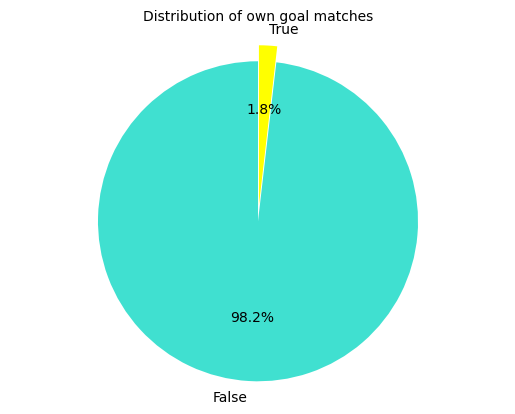

In [129]:
goals = df_goalscorers['own_goal'].value_counts()
plt.pie(goals.values, labels= goals.index, autopct='%1.1f%%', startangle=90, explode=[0, 0.1], colors=['turquoise', 'yellow'])
plt.title('Distribution of own goal matches', size=10)
plt.axis('equal')
plt.show()

#### <a id='toc1_1_6_12_'></a>[Spieler](#toc0_)

In [130]:
# Goals scored against favorite opponents by famous goalscoreres
df_scorers = df_goalscorers['scorer'].unique()

In [131]:
df_goalscorers['opponent'] = df_goalscorers.apply(lambda row: row['away_team'] if row['team'] == row['home_team'] else row['home_team'], axis=1)

fav_opp = df_goalscorers.groupby(['scorer', 'opponent']).size().reset_index(name='goals')
fav_opp = fav_opp.loc[fav_opp.groupby('scorer')['goals'].idxmax()]

players = ['Lionel Messi', 'Romelu Lukaku', 'Cristiano Ronaldo', 'Robert Lewandowski', 'Neymar', 'Harry Kane', 'Diego Maradona', 'Kylian Mbappé',
           'Olivier Giroud', 'Thomas Müller', 'Pelé', 'Son Heung-min', 'Lê Công Vinh', 'Luis Suárez',
           'Edin Džeko', 'Miroslav Klose']

top_players_stats = fav_opp[fav_opp['scorer'].isin(players)]
top_players_stats['label'] = top_players_stats['opponent'] + ': ' + top_players_stats['goals'].astype(str) + ' goals'

# Radar chart
fig = go.Figure()

for player in players:
    player_data = top_players_stats[top_players_stats['scorer'] == player]
    fig.add_trace(go.Scatterpolar(
        r=player_data['goals'],
        theta=player_data['opponent'],
        fill='toself',
        name=player
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(top_players_stats['goals']) + 1]
        )
    ),
    showlegend=True,
    title='Goals scored against favorite opponents by famous goalscorers'
)

fig.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_4244\2620839769.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_players_stats['label'] = top_players_stats['opponent'] + ': ' + top_players_stats['goals'].astype(str) + ' goals'


In [132]:
df_goalscorers['opponent'] = df_goalscorers.apply(lambda row: row['away_team'] if row['team'] == row['home_team'] else row['home_team'], axis=1)

fav_opp = df_goalscorers.groupby(['scorer', 'opponent']).size().reset_index(name='goals')
fav_opp = fav_opp.loc[fav_opp.groupby('scorer')['goals'].idxmax()]

players = ['Lionel Messi', 'Romelu Lukaku', 'Cristiano Ronaldo', 'Robert Lewandowski', 'Neymar', 'Harry Kane', 'Diego Maradona', 'Kylian Mbappé',
           'Olivier Giroud', 'Thomas Müller', 'Pelé', 'Son Heung-min', 'Lê Công Vinh','Luis Suárez',
           'Edin Džeko', 'Miroslav Klose']
top_players_stats = fav_opp[fav_opp['scorer'].isin(players)]
top_players_stats['label'] = top_players_stats['opponent'] + ': ' + top_players_stats['goals'].astype(str) + ' goals'

fig = px.bar(top_players_stats, x='goals',
             y= 'scorer',
             color = 'goals',
             title = 'Goals scored against favorite opponents by famous goalscorers',
             text = 'label',
             orientation = 'h')
            
fig.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_4244\2011534026.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<hr class="my-4">

<div class="alert alert-info" role="alert">
  Model Evaluation & Training
</div>

<h1 style="text-align:center;font-size:230%;;">Machine Learning Modelle</h1>

<form action="/action_page.php">
  <fieldset>
    <legend>Auswahl und Vergleich verschiedener ML / DS Verfahren</legend>
    
   <div class="card">
    <p class="card-text">Alle Ideen und verwendeten und auch nicht verwendeten Modelle beschreiben</p>
  
  </div>
</div>
    
  </fieldset>
</form>

In [133]:
# Code

<div class="alert alert-danger" role="alert">
  Performance der Modelle
</div>

<hr class="my-4">

<h1 style="text-align:center;font-size:230%;;">Projektbericht</h1>

<hr class="my-4">

## Einleitung

Zur Vorhersage von Fußballergebnissen werden verschiedene Machine-Learning-Modelle eingesetzt und die dafür notwendige Datenaufbereitung durchgeführt. Ziel ist es, durch die Analyse historischer Daten und die Anwendung verschiedener Modelle präzise Vorhersagen für zukünftige Spiele zu treffen. Der Ansatz umfasst mehrere Schritte von der  Datenaufbereitung über das Feature Engineering bis hin zur Modellauswahl und -evaluierung.

Die initiale Datenaufbereitung ist entscheidend für den Erfolg jedes maschinellen Lernprojekts. Die Funktion *prepare_data()* bereitet den Datensatz für das maschinelle Lernen vor, indem sie neue Merkmale hinzufügt, die Daten transformiert und sie in Trainings- und Vorhersagesätze aufteilt. Ein wesentlicher Teil dieser Vorbereitung ist das Hinzufügen einer Konstanten, die für Regressionsmodelle zur Schätzung des *Intercepts* benötigt wird. Diese Konstante ermöglicht es dem Modell, systematische Verschiebungen zu erfassen und somit genauere Vorhersagen zu liefern. Sie stellt den Wert des abhängigen Merkmals dar, wenn alle unabhängigen Variablen gleich Null sind (Schnittpunkt mit der y-Achse). Einige mathematische Verfahren zur Berechnung von Regressionskoeffizienten setzen eine Konstante voraus, um sicherzustellen, dass die Schätzungen unverzerrt und effizient sind. Beispielsweise erfordert die Methode der kleinsten Quadrate (OLS) eine Konstante, um sicherzustellen, dass der Mittelwert der Residuen gleich Null ist. 

Um die Performance zu erhöhen, ermöglicht die Funktion *parallel_apply()* eine Parallelisierung der Berechnungen, was insbesondere bei großen Datensätzen von Vorteil ist. Der DataFrame wird in mehrere Teile zerlegt und die entsprechende Funktion wird auf jedem Teil parallel ausgeführt, was die Rechenzeit erheblich verkürzt. Die Funktion *add_head2head()* erweitert den Datensatz um zusätzliche Spalten, die die Tore der letzten drei Duelle sowie der letzten drei Spiele für Heim- und Auswärtsmannschaften enthalten. Begegnungen beziehen sich hier auf direkte Duelle zwischen zwei spezifischen Teams, während Spiele allgemein alle letzten Spiele eines Teams unabhängig vom Gegner umfassen. Weitere Schritte des Feature-Engineering sind das Hinzufügen von Merkmalen wie Jahrzehnt und FIFA-Rang sowie die Berechnung der Form einer Fußballmannschaft anhand der letzten fünf Spiele vor dem Datum des aktuell betrachteten Spiels. Diese Form, repräsentiert durch durchschnittliche Tore und Punkte, wird für Heim- und Auswärtsmannschaften berechnet.

## Grundlagen

Zur Optimierung von Vorhersagen in Klassifikations- und Regressionsmodellen können die Daten polynomisiert werden, um mehr als nur lineare Beziehungen zwischen den Merkmalen und der Zielvariablen abzubilden. Bei der Polynomisierung werden die Merkmale eines Datensatzes erweitert, indem ihre Potenzen zu den ursprünglichen Merkmalen hinzugefügt werden. Diese Erweiterung ermöglicht es, nicht-lineare Zusammenhänge in den Daten besser zu erfassen und komplexere Muster zwischen den Variablen zu erkennen. Die neu generierten Merkmale liefern zusätzliche Informationen über die Beziehungen zwischen den ursprünglichen Merkmalen, was die Vorhersagegenauigkeit der Modelle verbessern kann. Für jedes Modell werden die Daten von Grad 0 bis Grad 3 polynomisiert, wodurch die Abstände zwischen den Datenpunkten vergrößert werden. 

Grad 0 entspricht einem konstanten Modell, das nur den Mittelwert oder den Median der Zielvariablen vorhersagt und als Basislinie für den Vergleich der Leistung anderer Modelle dient. Grad 1 entspricht einem linearen Modell, das die Beziehung zwischen Merkmalen und der Zielvariablen darstellt und somit den ursprünglichen Datensatz (hier: DataFrame) widerspiegelt.
Grad 2 erzeugt quadratische Merkmale und modelliert einfache nicht-lineare Beziehungen zwischen den Merkmalen. Dies kann die Modellleistung verbessern, wenn die Daten quadratische Muster enthalten. Die quadratischen Werte werden dem vorhandenen DataFrame hinzugefügt. Grad 3 erzeugt kubische Merkmale, die noch komplexere nicht-lineare Muster erfassen können. Dies erhöht jedoch das Risiko des Overfittings und erfordert daher eine sorgfältigere Validierung. Zusätzlich zu den normalen und quadratischen Merkmalen werden die kubischen Merkmale dem DataFrame hinzugefügt. Die Polynomisierung wird verwendet, um eine detaillierte Erfassung der Zusammenhänge und eine höhere Flexibilität und Leistungsfähigkeit der Modelle zu erreichen.

### Klassifizierungsmodelle

Zur Vorhersage von Sieg oder Niederlage der Heimmannschaft werden verschiedene Klassifikationsmodelle verwendet, darunter eine Support Vector Machine mit verschiedenen Basisfunktionen, ein Random Decision Forest und eine logistische Regression. Durch das Erkennen von Mustern in den Daten können Klassifikationsmodelle Datenpunkte in definierte Kategorien einteilen (engl. "clustering")  (vgl. [1] S. 101). Dabei sollten die Daten innerhalb der Kategorien homogen und zwischen den Kategorien heterogen sein (vgl. [2] S. 6). Im vorliegenden Projekt lauten die Kategorien "Sieg" und "Niederlage".

#### Support-Vector-Machine

Support-Vector-Machines (SVMs) sind eine Klasse von Algorithmen für Klassifikations- und Regressionsaufgaben, die von Vladimir Vapnik und seinen Kollegen entwickelt wurden. Diese Maschinen sind besonders effektiv bei hochdimensionalen Daten und zeichnen sich durch ihre Fähigkeit aus, lineare und nicht-lineare Trennungen zu modellieren. SVMs zielen darauf ab, eine optimale Trennlinie (engl. Hyperplane) zu finden, die die Datenpunkte verschiedener Klassen mit maximalem Abstand trennt (Large Margin Classifier) (vgl. [3] S.131). Im zweidimensionalen Raum ist die Hyperplane eine Linie, im dreidimensionalen Raum eine Ebene, und in höheren Dimensionen eine allgemeine Hyperfläche. Mathematisch wird dies durch die Lösung eines Optimierungsproblems erreicht:
![SVM](pictures\SVM.png)

Die Trennfläche mit dem größten objektfreien Bereich wird als optimale Lösung angesehen (vgl. [3] S.132). In „The Nature of Statistical Learning Theory“ beschreibt Vapnik die theoretischen Grundlagen und die praktischen Anwendungen von SVMs.
Im Abschnitt „Support-Vector-Machine“ des Jupyter Notebooks wird eine Support-Vector-Machine initialisiert. Im Zusammenhang mit dem vorliegenden Code bezieht sich der Parameter degree auf den Grad des im Polynomkern verwendeten Polynoms. Der Grad des Polynoms bestimmt die Komplexität der Abbildung und beeinflusst somit die Fähigkeit des Modells, nicht-lineare Muster zu erkennen und zu lernen. Der Kernel-Parameter spezifiziert den Kernel (s. Kernel-Funktionen) und der C-Parameter fungiert als Regularisierungsparameter und steuert den Kompromiss zwischen der Maximierung des Margins und der Minimierung des Klassifikationsfehlers auf den Trainingsdaten. Ein hoher Wert für C bedeutet, dass das Modell versucht, alle Trainingsdaten korrekt zu klassifizieren. Der Parameter random_state ist eine Kontrollvariable und setzt den Wert 42 als festen Seed für den Zufallsgenerator, damit die Ausführung des Codes reproduzierbar ist.  SVMs können mit nicht-linear trennbaren Daten umgehen, indem sie die Daten in einen höherdimensionalen Raum transformieren, in dem die Daten linear trennbar werden. Dies geschieht durch so genannte Kernel-Funktionen. Nicht-lineare Daten werden so modifiziert, dass sie ebenfalls linear trennbar werden. Im Projekt werden vier verschiedene Kernel-Funktionen verwendet:
- Die Lineare Basisfunktion K(x,x_i )=[(x,x_i )] modelliert lineare Beziehungen zwischen den Features. 
- Die Polynomielle Basisfunktion wird durch die Funktion K(x,x_i )=[(x*x_i )+1]^d beschrieben. Sie wandelt Features in höhere Potenzen um, wobei d den Grad angibt (S. 144). 
- Die Radiale Basisfunktion modelliert komplexe nicht-lineare Beziehungen durch die Berücksichtigung der Abstände zwischen den Datenpunkten und γ bestimmt den Einflussbereich dieser Punkte. Sie wird beschrieben durch die Funktion K_γ (|x-x_i |)=exp⁡{-γ|x-x_i |^2} (S. 145), wobei γ ≥ 0 den Einfluss eines Trainingsbeispiels angibt (vgl. [4]). 
- Die Sigmoidale Basisfunktion kann mit einer Aktivierungsfunktion für neuronale Netze verglichen werden und modelliert ebenfalls nicht-lineare Beziehungen. Sie sieht wie folgt aus: K(x,x_i )= tanh⁡(γ*(x-x_i )+c) (S. 146). 

Verschiedene Metriken werden verwendet, um die Leistung einer Support Vector Machine zu bewerten. Diese Metriken ermöglichen eine umfassende Bewertung der Modellleistung und helfen, die Stärken und Schwächen des Modells zu identifizieren. (Mehr dazu [5])

#### Random Decision Forest

Ein weiteres Klassifizierungsmodell ist der Random Decision Forest. Dieses Modell besteht aus einer Vielzahl von Entscheidungsbäumen, die auf zufälligen Teilmengen (engl. „Subsets“) der Trainingsdaten mit zufällig ausgewählten Merkmalen trainiert werden (vgl. [6] S. 5-6). Jeder Baum gibt eine Klassifikationsvorhersage ab, die endgültige Vorhersage erfolgt durch eine Mehrheitsentscheidung der Bäume. Der ursprünglich von Leo Breiman entwickelte Random Decision Forest verwendet die Methode des Baggings, um die Vorhersagegenauigkeit zu verbessern und die Generalisierungsfähigkeit des Modells zu erhöhen (vgl. [6] S. 11). 

Der Hauptvorteil liegt in der Fähigkeit, durch die Aggregation mehrerer schwacher Lernalgorithmen (Entscheidungsbäume) eine starke Gesamtvorhersage zu liefern. Random Decision Forests sind robust gegenüber Rauschen in den Daten und neigen auch bei einer großen Anzahl von Bäumen nicht zur Überanpassung („overfitting“) (vgl. [6] S. 6, S. 29). Diese Modelle können daher zuverlässige Vorhersagen treffen, selbst wenn die Daten variabel und inkonsistent sind, was bei Fußballdaten häufig der Fall ist.

Der Random Decision Forest lässt sich mathematisch durch die Aggregation der Vorhersagen h(x,Θ_k ) vieler Entscheidungsbäume ausdrücken, wobei Θ_k die Zufallsvariablen sind, die die Konstruktion des k-ten Baums steuern. Hierbei wird der sogenannte Margin mg(X,Y) verwendet, der definiert ist als:
![SVM](pictures\RDF1.png)
wobei I(.) die Indikatorfunktion ist. Der Generalisierungsfehler des Modells ist dann:
![SVM](pictures\RDF2.png)

Der Random Decision Forest verwendet die „Strong Law of Large Numbers“ (vgl. [6] S. 7), um sicherzustellen, dass der Generalisierungsfehler mit zunehmender Anzahl von Bäumen gegen einen Grenzwert konvergiert, was erklärt, warum Random Forests nicht zur Überanpassung neigen. Die finale Schätzung der Standardabweichung sd(Θ) gibt an, wie stark die Vorhersagen des Random Decision Forests streuen:
![SVM](pictures\RDF3.png)

Eine niedrigere Standardabweichung bedeutet, dass die Vorhersagen der einzelnen Bäume im Modell konsistenter sind. Dies ist wichtig, um die Stabilität und Zuverlässigkeit des Modells zu beurteilen. Ein stabileres Modell führt zu robusteren Vorhersagen, was besonders bei variablen und inkonsistenten Daten, wie sie oft im Fußball vorkommen, von Vorteil ist (vgl. [6] S. 7, S. 32). 

Der Abschnitt „Random Decision Forest“ im Jupyter Notebook erstellt und trainiert einen Random Decision Forest mit 100 Bäumen (*n_estimators=100*). Zuerst werden die Daten in Trainings- und Testdaten aufgeteilt (*x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)*), um die Leistung des Modells zu validieren. Die Trainingsdaten werden in mehrere Subsets aufgeteilt, wobei für jedes Subset ein Entscheidungsbaum trainiert wird. Diese Subsets werden zufällig aus den Trainingsdaten erzeugt. An jedem Knoten eines Entscheidungsbaums wird eine zufällige Auswahl von Merkmalen getroffen, um die beste Aufteilung zu finden. Diese zufällige Auswahl reduziert die Korrelation zwischen den Bäumen und verbessert die Robustheit des Modells gegen Überanpassung (Overfitting). Das Modell wird mit Trainingsdaten trainiert und anschließend mit Testdaten evaluiert. Die Genauigkeit des Modells wird sowohl in gerundeter als auch in tatsächlicher Form berechnet und ausgegeben. Die Ergebnisse des Modells werden gespeichert und in dem DataFrame (*key_indicators_df*) zusammengefasst. Jeder Entscheidungsbaum gibt eine Vorhersage und die endgültige Vorhersage des Random Forest wird durch eine Mehrheitsentscheidung (bei Klassifikationsaufgaben) getroffen. 

#### Logistische Regression

Die logistische Regression ist ein Klassifizierungsmodell, um die Wahrscheinlichkeit zu modellieren, dass eine bestimmte Klasse vorliegt, basierend auf den gegebenen Prädiktorvariablen. Das Modell gibt die Wahrscheinlichkeit p_i , dass die abhängige Variable Y_i den Wert 1 annimmt, als eine Funktion der Prädiktorvariablen x_i an. Diese Beziehung wird durch folgende Funktion beschrieben: 
![SVM](pictures\LR1.png)

Hierbei ist x_i^' θ das lineare Prädiktorprodukt aus den Prädiktorvariablen x_i und den zu schätzenden Koeffizienten θ. Die logistische Funktion stellt sicher, dass die vorhergesagte Wahrscheinlichkeit p_i immer zwischen 0 und 1 liegt (vgl. [7] S. 509). Die Schätzung der Parameter erfolgt durch Maximierung der Likelihood-Funktion:
![SVM](pictures\Likelihood.png)

wobei p_i durch die logistische Funktion gegeben ist. Diese Maximierung kann iterativ erfolgen, wobei Verfahren wie der Newton-Raphson-Algorithmus eingesetzt werden (vgl. [7] S. 509 – 511). 

Die logistische Regression ist nützlich, weil sie nicht nur Vorhersagen trifft, sondern auch die Stärke und Richtung der Beziehung zwischen den Prädiktoren und der Zielvariablen quantifiziert. In diesem Projekt zur Vorhersage von Fußballergebnissen wird die logistische Regression eingesetzt, um die Wahrscheinlichkeit eines bestimmten Ergebnisses (hier: Sieg oder Niederlage) vorherzusagen. Auch hier werden die Daten in Trainings- und Testdatensätze aufgeteilt (*x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)*) und mit *model = sm.Logit(y_train, x_train)* wird das logistische Regressionsmodell erstellt. 

### Regressionsmodelle

Zur Vorhersage der Anzahl der Tore für Heim- und Auswärtsteams werden verschiedene Regressionsmodelle verwendet, darunter Ordinary Least Squares (OLS), Weighted Least Squares (WLS), robuste lineare Modelle mit Huber-T-Verlustfunktion und robuste lineare Modelle mit Tukey's Biweight-Verlustfunktion. Regressionsmodelle werden eingesetzt, um den Zusammenhang zwischen den unabhängigen Variablen und der abhängigen Variablen (Anzahl der Tore) zu modellieren und vorherzusagen. Diese Modelle schätzen die Parameter so, dass die Summe der quadrierten Abweichungen zwischen den beobachteten und vorhergesagten Werten minimiert wird (vgl. [8] S. 77). Diese Regressionsmodelle ermöglichen eine detaillierte Analyse und vage Vorhersage der Toranzahl, indem sie den Zusammenhang zwischen verschiedenen Spielvariablen und den Toren modellieren. 

Zunächst werden Regression Helper-Funktionen erstellt, die als Werkzeuge zur Bewertung und Analyse der Modelle helfen. Sie ermöglichen die Berechnung robuster Anpassungsmaße, die Berücksichtigung der Modellkomplexität und die Bewertung der numerischen Stabilität der Schätzungen. Die Funktion *rsquared_robust(y, y_pred, weights)* berechnet das robuste Bestimmtheitsmaß (R^2) für gewichtetete Regressionen. Sie berücksichtigt die Gewichte, die bei der Regression verwendet wurden, und gibt eine robustere Schätzung der Modellgüte zurück. 
![SVM](pictures\rsquared.png)

Numerator: Summe der gewichteten quadrierten Residuen.
Denominator: Summe der gewichteten quadrierten Abweichungen vom gewichteten Mittelwert.
Gewichtetes Mittel:
![SVM](pictures\gewichtetesMittel.png)

Diese Funktion ist nützlich, wenn die Daten Heteroskedastizität (unterschiedliche Varianz) aufweisen oder wenn robuste Regressionsmethoden verwendet wurden (vgl. [9] S. 3-5). Die nächste Helper- Funktion *rsquared_pseudo(y, y_pred)* berechnet das pseudo Bestimmtheitsmaß (R^2) für die Vorhersagen. Sie vergleicht die Summe der quadrierten Residuen mit der Gesamtvarianz der Zielvariablen.
![SVM](pictures\pseudor.png)

Diese Formel wird häufig verwendet, um die Anpassungsgüte eines Modells zu bewerten, insbesondere in Situationen, in denen keine Gewichtung erforderlich ist (vgl. [9] S. 2).

Die dritte Helper-Funktion *adj_rsquared(x, y, r_squared)* berechnet das adjustierte Bestimmtheitsmaß (R^2) unter Berücksichtigung der Anzahl der Prädiktoren und der Stichprobengröße:
![SVM](pictures\adjr.png)

Diese Berechnung stellt sicher, dass das R^2 nicht künstlich aufgeblasen wird, wenn die Anzahl der Prädiktoren steigt, und gibt eine genauere Schätzung der Modellgüte. Sie ist nützlich, um überangepasste Modelle (Overfitting) zu identifizieren und zu bewerten, wie gut das Modell mit der Anzahl der verwendeten Prädiktoren skaliert (vgl. [9] S. 9, S. 13).
Schließlich berechnet die vierte Funktion condition_number(x) die Konditionszahl der Designmatrix X, die verwendet wurde, um das Regressionsmodell zu trainieren. Eine hohe Konditionszahl weist auf Multikollinearität hin, d.h. einige Prädiktoren sind stark korrelier, was zu instabilen Schätzungen der Regressionskoeffizienten führen kann. Diese Funktion hilft, die Stabilität und Verlässlichkeit der Modellschätzungen zu beurteilen.

#### Ordinary Least Squares

Ordinary Least Squares (OLS) ist eine Methode in der Regressionsanalyse zur Schätzung der Parameter eines linearen Modells. Das Hauptziel besteht darin, die Summe der quadrierten Differenzen zwischen beobachteten und vorhergesagten Werten zu minimieren. Diese Methode wird häufig aufgrund ihrer Einfachheit und der wünschenswerten Eigenschaften der Schätzer, wie Unverzerrtheit und minimaler Varianz unter allen linearen unverzerrten Schätzern verwendet (vgl. [10] S. 3-5, 467 - 471.). 
Der OLS-Schätzer wird durch Lösen der Normalengleichungen gewonnen, die durch Nullsetzen der partiellen Ableitungen der Summe der quadrierten Residuen entstehen. Für ein lineares Modell Y=Xß+ ∈, wobei Y die abhängige Variable, X die Matrix der unabhängigen Variablen, β der Vektor der Parameter und ϵ der Fehlerterm ist, wird der OLS-Schätzer β^ wie folgt berechnet:
![SVM](pictures\OLS.png)
In dem Abschnitt Ordinary Least Squares des Jupyter Notebooks wird die OLS-Methode aus der statsmodels-Bibliothek verwendet, um ein lineares Modell an die Trainingsdaten anzupassen, und verschiedene Leistungsmetriken werden berechnet, um das Modell zu bewerten.

#### Weighted Least Squares

Weighted Least Squares (WLS) ist eine Verallgemeinerung von OLS, die verwendet wird, wenn die Annahme der Homoskedastizität (konstante Varianz der Fehler) verletzt wird (vgl. [10] S. 28). WLS weist jeder Beobachtung ein Gewicht zu, um Heteroskedastizität zu berücksichtigen, was zu zuverlässigeren Parameterschätzungen führt.
Der WLS-Schätzer wird ähnlich wie der OLS-Schätzer hergeleitet, jedoch unter Einbeziehung von Gewichten W, die typischerweise das Inverse der Varianz der Beobachtungen sind. Für ein Modell Y=Xß+ ϵ mit Gewichten W wird der WLS-Schätzer ß_WLS^(〖^〗)  wie folgt berechnet:
![SVM](pictures\wls.png)


In dem Abschnitt Weighted Least Squares des Jupyter Notebooks wird zunächst ein OLS-Modell an die Daten angepasst, um Residuen zu erhalten, die dann zur Berechnung von Gewichten für das WLS-Modell verwendet werden. Das WLS-Modell wird dann unter Verwendung dieser Gewichte an die Daten angepasst, und verschiedene Leistungsmetriken werden berechnet, um das Modell zu bewerten (vgl. [10] S. 414-426).

#### Robuste lineare Modelle mit Huber-T-Verlustfunktion und Tukey's Biweight-Verlustfunktion 
Robuste lineare Modelle mit der Huber-T-Verlustfunktion und Tukey's Biweight-Verlustfunktion sind Methoden, die in der robusten Statistik verwendet werden, um die Auswirkungen von Ausreißern und Abweichungen von Modellannahmen zu minimieren. Diese Modelle sind besonders nützlich, wenn die Daten nicht den klassischen Annahmen der Normalverteilung der Fehler und der Abwesenheit von Ausreißern entsprechen (vgl. [10] S. 5). 
Die Huber-T-Verlustfunktion ist eine hybride Methode, die die quadratische Verlustfunktion für kleine Residuen und die absolute Verlustfunktion für große Residuen kombiniert. Diese Funktion wird häufig eingesetzt, um die Sensitivität gegenüber Ausreißern zu verringern, ohne die Effizienz bei normalverteilten Fehlern zu stark zu beeinträchtigen:
![SVM](pictures\hubert.png)

wobei u das standardisierte Residuum und c ein Schwellenwert ist. Der Wert ccc bestimmt, ab wann die Funktion von einer quadratischen zu einer linearen Form übergeht. Diese Kombination ermöglicht es, dass kleine Fehler weiterhin quadratisch behandelt werden (was effizient ist), während große Fehler weniger Einfluss haben, indem sie linear behandelt werden. Die Huber-T-Verlustfunktion wird angewendet, indem ein M-Schätzer verwendet wird, der die Summe der Huber-Verluste minimiert. Hierbei wird σ typischerweise iterativ geschätzt, um die robusten Residuen zu bestimmen. Diese Methode ist besonders nützlich bei Daten mit moderaten Ausreißern, da sie eine Balance zwischen Effizienz und Robustheit bietet (vgl. [11]).

Die Tukey's Biweight-Verlustfunktion, auch als biquadratische Verlustfunktion bekannt, ist eine Methode, die darauf abzielt, extreme Ausreißer vollständig zu ignorieren. Dies wird durch eine Reduktionsfunktion erreicht, die bei sehr großen Residuen zu Null wird, wodurch diese Residuen keinen Einfluss auf die Schätzung der Parameter haben. Die Tukey's Biweight-Verlustfunktion ρ(u) ist definiert als:
![SVM](pictures\tukeys_biweight.png)

Hierbei ist u das standardisierte Residuum und ccc ein Schwellenwert, oberhalb dessen die Funktion konstant bleibt. Diese Definition sorgt dafür, dass extrem große Fehler keinen Einfluss auf die Schätzung der Parameter haben. Auch bei der Anwendung der Tukey's Biweight-Verlustfunktion wird ein M-Schätzer verwendet, der die Summe der biquadratischen Verluste minimiert. 
Die mathematische Implementierung dieser robusten Methoden lässt sich dies durch das folgende Optimierungsproblem darstellen, wobei β die zu schätzenden Regressionskoeffizienten und σ eine Schätzung der Skalierung der Residuen darstellt:
![SVM](pictures\optimierung.png)

Robustheit in der Datenanalyse gewährleistet somit, dass die Modelle widerstandsfähig gegenüber Störungen und Ungenauigkeiten in den Daten bleiben (vgl. [12] S. 3 ff.).


<hr class="my-4">

<div class="alert alert-info" role="alert">
  Model Validation
</div>

<h1 style="text-align:center;font-size:230%;;">Ergebnisse</h1>

<hr class="my-4">

<h1 style="text-align:center;font-size:230%;;">Fazit</h1>

<hr class="my-4">

### <a id='toc1_1_8_'></a>[Referenzen](#toc0_)

[1] Hastie, Trevor, et al. The elements of statistical learning: data mining, inference, and prediction. Vol. 2. New York: Springer, 2009.

[2] Höppner, Frank, and Frank Klawonn. Fuzzy-Clusteranalyse: Verfahren für die Bilderkennung, Klassifizierung und Datenanalyse. Springer-Verlag, 2013.

[3] Vapnik, Vladimir Naumovich, et al. Statistical learning theory. Springer-Verlag, 1998.

[4] https://scikit-learn.org/stable/modules/svm.html#svm-kernels  

[5] https://towardsdatascience.com/performance-metrics-for-classification-machine-learning-problems-97e7e774a007 

[6] Breiman, Leo. Random forests. Machine learning 45, 2001. 

[7] Rawlings, John O., Sastry G. Pantula, and David A. Dickey, eds. Applied regression analysis: a research tool. New York, NY: Springer New York, 1998. 

[8] Seber, George AF, and Alan J. Lee. Linear regression analysis. Vol. 936. John Wiley & Sons, 2012.

[9] O. Renaud, M.-P. Victoria-Feser. A robust coefficient of determination for regression. 2010

[10] Rawlings, John O., Sastry G. Pantula, and David A. Dickey, eds. Applied regression analysis: a research tool. New York, NY: Springer New York, 1998.

[11] Huber, P. J. (1964). Robust Estimation of a Location Parameter

[12] Chen, D. (2020). Tukey’s biweight estimation for uncertain regression model with imprecise observations. Soft Computing, 24(22), 16803-16809.